# 데이터 로드

In [322]:
# !pip install adjustText

In [323]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText

matplotlib.rcParams['font.family']='Malgun Gothic' # 한글 폰트 세팅
matplotlib.rcParams['font.size']= 16    # 폰트 크기를 셋팅
matplotlib.rcParams['axes.unicode_minus']=False # 유니코드가 -(마이너스) 기호로 설정되는 폰트


# 브랜드별 색상 팔레트 지정
colors = {'biobidet':'firebrick', 'brondell': 'coral', 'tushy':'gold', 'toto': 'lightgreen', 'ovedecors':'seagreen', 'alphabidet':'skyblue', 'kohler': 'royalblue', 'bidetmate':'mediumpurple', 'a_s': 'indigo', 'vovo':'black'}
# 채널별 색상 팔레트 지정
channel = {'costco':'black', 'amazon': 'darkgrey', 'build.com':'darkgoldenrod', 'walmart': 'gold', 'hd':'yellow', 'lowes':'orange'}

In [ ]:
import os
import pandas as pd

file_path = '../01-1. Raw Data (Bidet)/별점/' # 파일 경로
file_extension = '.xlsx' # 파일 확장자

file_list = [f for f in os.listdir(file_path) if f.endswith(file_extension)]

In [ ]:
data_frames = []
for file_name in file_list:
    channel = file_name.split('_')[0]
    df = pd.read_excel(file_path + file_name)
    df['채널명'] = channel
    df.rename(columns={'고유 제품명':'제품명'}, inplace=True)
    data_frames.append(df)

In [ ]:
combined_ratings_origin = pd.concat(data_frames, ignore_index=True)
combined_ratings_origin.info()

In [ ]:
# 카피본 떠놓고 시작하기
combined_ratings = combined_ratings_origin.copy()
combined_ratings.shape

In [ ]:
combined_ratings['채널명'].unique()

In [326]:
combined_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31395 entries, 0 to 31394
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   회사명     31395 non-null  object        
 1   제품명     31395 non-null  object        
 2   형태      31395 non-null  object        
 3   작성일     31395 non-null  datetime64[ns]
 4   별점      31395 non-null  int64         
 5   채널명     31395 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [327]:
# 카피본 떠놓고 시작하기
combined_ratings = combined_ratings_origin.copy()
combined_ratings.shape

(31395, 6)

In [328]:
combined_ratings['채널명'].unique()

array(['hd', 'costco', 'walmart', 'amazon', 'build.com', 'lowes'],
      dtype=object)

In [329]:
combined_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31395 entries, 0 to 31394
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   회사명     31395 non-null  object        
 1   제품명     31395 non-null  object        
 2   형태      31395 non-null  object        
 3   작성일     31395 non-null  datetime64[ns]
 4   별점      31395 non-null  int64         
 5   채널명     31395 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [330]:
count_df = combined_ratings.groupby(['회사명', '제품명'])['별점'].count().reset_index(name='별점 수')
count_df

,회사명,제품명,별점 수
0,a_s,Advanced Clean 1.0 SpaLet,48
1,a_s,Advanced Clean 2.0 SpaLet,56
2,a_s,Advanced Clean 2.5 SpaLet,32
3,a_s,AquaWash 2.0 SpaLet,39
4,alphabidet,Alpha JX,427
5,bidetmate,2000 Series,47
6,bidetmate,3000 Series,195
7,biobidet,BB A8,76
8,biobidet,BB Elite3,3725
9,biobidet,BB USPA 6800,8954


In [331]:
mean_df = combined_ratings.groupby(['회사명', '제품명'])['별점'].mean().reset_index(name='별점 평균')
mean_df

,회사명,제품명,별점 평균
0,a_s,Advanced Clean 1.0 SpaLet,4.291667
1,a_s,Advanced Clean 2.0 SpaLet,4.714286
2,a_s,Advanced Clean 2.5 SpaLet,4.625000
3,a_s,AquaWash 2.0 SpaLet,4.692308
4,alphabidet,Alpha JX,4.419204
5,bidetmate,2000 Series,4.042553
6,bidetmate,3000 Series,4.210256
7,biobidet,BB A8,4.736842
8,biobidet,BB Elite3,4.404027
9,biobidet,BB USPA 6800,4.462810


In [332]:
temp_df = pd.merge(count_df, mean_df, on=(['회사명','제품명']))
temp_df

,회사명,제품명,별점 수,별점 평균
0,a_s,Advanced Clean 1.0 SpaLet,48,4.291667
1,a_s,Advanced Clean 2.0 SpaLet,56,4.714286
2,a_s,Advanced Clean 2.5 SpaLet,32,4.625000
3,a_s,AquaWash 2.0 SpaLet,39,4.692308
4,alphabidet,Alpha JX,427,4.419204
5,bidetmate,2000 Series,47,4.042553
6,bidetmate,3000 Series,195,4.210256
7,biobidet,BB A8,76,4.736842
8,biobidet,BB Elite3,3725,4.404027
9,biobidet,BB USPA 6800,8954,4.462810


In [333]:
temp_df['별점 총합']=temp_df['별점 수']*temp_df['별점 평균']
temp_df

,회사명,제품명,별점 수,별점 평균,별점 총합
0,a_s,Advanced Clean 1.0 SpaLet,48,4.291667,206.0
1,a_s,Advanced Clean 2.0 SpaLet,56,4.714286,264.0
2,a_s,Advanced Clean 2.5 SpaLet,32,4.625000,148.0
3,a_s,AquaWash 2.0 SpaLet,39,4.692308,183.0
4,alphabidet,Alpha JX,427,4.419204,1887.0
5,bidetmate,2000 Series,47,4.042553,190.0
6,bidetmate,3000 Series,195,4.210256,821.0
7,biobidet,BB A8,76,4.736842,360.0
8,biobidet,BB Elite3,3725,4.404027,16405.0
9,biobidet,BB USPA 6800,8954,4.462810,39960.0


In [334]:
def weighted_avg_log(df):
    # 전체 : log 10 / 리뷰수 : log2
    df['로그전체'] = np.log10(df['별점 총합'] + 1)
    df['로그리뷰수'] = np.log2(df['별점 수'] + 1)
    # log2 설정
    
    # 가중평균 구하기
    total_weight = df['로그리뷰수'].sum()
    df['가중평균'] = (df['로그전체'] * df['로그리뷰수']).sum() / total_weight
    
    return df

log_avg = temp_df.groupby(['회사명', '제품명']).apply(weighted_avg_log)

log_avg.sort_values('가중평균',ascending=False).head(20)

log_avg.sort_values('가중평균',ascending=False).head(20).sort_values('회사명',ascending=True)

,회사명,제품명,별점 수,별점 평균,별점 총합,로그전체,로그리뷰수,가중평균
4,alphabidet,Alpha JX,427,4.419204,1887.0,3.276002,8.741467,3.276002
9,biobidet,BB USPA 6800,8954,4.462810,39960.0,4.601636,13.128478,4.601636
12,biobidet,BB2000,1958,4.540858,8891.0,3.948999,10.935902,3.948999
10,biobidet,BB1000,571,4.719790,2695.0,3.430720,9.159871,3.430720
13,biobidet,BB600,3108,4.354569,13534.0,4.131458,11.602235,4.131458
8,biobidet,BB Elite3,3725,4.404027,16405.0,4.215003,11.863412,4.215003
23,brondell,S1400,2056,4.496109,9244.0,3.965907,11.006326,3.965907
18,brondell,CL1700,955,4.024084,3843.0,3.584783,9.900867,3.584783
17,brondell,CL1500,694,4.338617,3011.0,3.478855,9.440869,3.478855
21,brondell,LT99,279,3.874552,1081.0,3.034227,8.129283,3.034227


In [335]:
log_avg = log_avg[['회사명', '제품명', '별점 수', '별점 평균', '가중평균']]
log_avg

,회사명,제품명,별점 수,별점 평균,가중평균
0,a_s,Advanced Clean 1.0 SpaLet,48,4.291667,2.315970
1,a_s,Advanced Clean 2.0 SpaLet,56,4.714286,2.423246
2,a_s,Advanced Clean 2.5 SpaLet,32,4.625000,2.173186
3,a_s,AquaWash 2.0 SpaLet,39,4.692308,2.264818
4,alphabidet,Alpha JX,427,4.419204,3.276002
5,bidetmate,2000 Series,47,4.042553,2.281033
6,bidetmate,3000 Series,195,4.210256,2.914872
7,biobidet,BB A8,76,4.736842,2.557507
8,biobidet,BB Elite3,3725,4.404027,4.215003
9,biobidet,BB USPA 6800,8954,4.462810,4.601636


In [336]:
log_avg['조정 별점 단위'] = log_avg['가중평균'] / log_avg['별점 평균']
log_avg

,회사명,제품명,별점 수,별점 평균,가중평균,조정 별점 단위
0,a_s,Advanced Clean 1.0 SpaLet,48,4.291667,2.315970,0.539644
1,a_s,Advanced Clean 2.0 SpaLet,56,4.714286,2.423246,0.514022
2,a_s,Advanced Clean 2.5 SpaLet,32,4.625000,2.173186,0.469878
3,a_s,AquaWash 2.0 SpaLet,39,4.692308,2.264818,0.482666
4,alphabidet,Alpha JX,427,4.419204,3.276002,0.741310
5,bidetmate,2000 Series,47,4.042553,2.281033,0.564256
6,bidetmate,3000 Series,195,4.210256,2.914872,0.692326
7,biobidet,BB A8,76,4.736842,2.557507,0.539918
8,biobidet,BB Elite3,3725,4.404027,4.215003,0.957079
9,biobidet,BB USPA 6800,8954,4.462810,4.601636,1.031107


In [337]:
temp_df = pd.merge(combined_ratings, log_avg, on=(['회사명', '제품명']))
temp_df

,회사명,제품명,형태,작성일,별점,채널명,별점 수,별점 평균,가중평균,조정 별점 단위
0,brondell,SE600,R,2017-09-20,5,hd,401,4.379052,3.244772,0.740976
1,brondell,SE600,R,2018-01-03,3,hd,401,4.379052,3.244772,0.740976
2,brondell,SE600,R,2018-01-03,5,hd,401,4.379052,3.244772,0.740976
3,brondell,SE600,R,2018-01-24,5,hd,401,4.379052,3.244772,0.740976
4,brondell,SE600,R,2018-02-02,5,hd,401,4.379052,3.244772,0.740976
...,...,...,...,...,...,...,...,...,...,...
31390,brondell,CL510,R,2018-12-02,5,lowes,37,4.675676,2.240549,0.479193
31391,brondell,CL510,R,2020-04-02,5,lowes,37,4.675676,2.240549,0.479193
31392,brondell,CL510,R,2021-01-04,5,lowes,37,4.675676,2.240549,0.479193
31393,brondell,CL510,R,2019-10-30,5,lowes,37,4.675676,2.240549,0.479193


In [338]:
temp_df['조정 별점'] = temp_df['조정 별점 단위'] * temp_df['별점']
temp_df

,회사명,제품명,형태,작성일,별점,채널명,별점 수,별점 평균,가중평균,조정 별점 단위,조정 별점
0,brondell,SE600,R,2017-09-20,5,hd,401,4.379052,3.244772,0.740976,3.704879
1,brondell,SE600,R,2018-01-03,3,hd,401,4.379052,3.244772,0.740976,2.222927
2,brondell,SE600,R,2018-01-03,5,hd,401,4.379052,3.244772,0.740976,3.704879
3,brondell,SE600,R,2018-01-24,5,hd,401,4.379052,3.244772,0.740976,3.704879
4,brondell,SE600,R,2018-02-02,5,hd,401,4.379052,3.244772,0.740976,3.704879
...,...,...,...,...,...,...,...,...,...,...,...
31390,brondell,CL510,R,2018-12-02,5,lowes,37,4.675676,2.240549,0.479193,2.395963
31391,brondell,CL510,R,2020-04-02,5,lowes,37,4.675676,2.240549,0.479193,2.395963
31392,brondell,CL510,R,2021-01-04,5,lowes,37,4.675676,2.240549,0.479193,2.395963
31393,brondell,CL510,R,2019-10-30,5,lowes,37,4.675676,2.240549,0.479193,2.395963


In [339]:
combined_ratings = temp_df[['회사명', '제품명', '작성일', '별점', '조정 별점', '채널명']]
combined_ratings

,회사명,제품명,작성일,별점,조정 별점,채널명
0,brondell,SE600,2017-09-20,5,3.704879,hd
1,brondell,SE600,2018-01-03,3,2.222927,hd
2,brondell,SE600,2018-01-03,5,3.704879,hd
3,brondell,SE600,2018-01-24,5,3.704879,hd
4,brondell,SE600,2018-02-02,5,3.704879,hd
...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,2.395963,lowes
31391,brondell,CL510,2020-04-02,5,2.395963,lowes
31392,brondell,CL510,2021-01-04,5,2.395963,lowes
31393,brondell,CL510,2019-10-30,5,2.395963,lowes


In [340]:
combined_ratings['연도'] = combined_ratings['작성일'].dt.to_period("Y")
combined_ratings['분기'] = combined_ratings['작성일'].dt.to_period("Q")
combined_ratings

C:\Users\user\AppData\Local\Temp\ipykernel_14332\338381656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_ratings['연도'] = combined_ratings['작성일'].dt.to_period("Y")
C:\Users\user\AppData\Local\Temp\ipykernel_14332\338381656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_ratings['분기'] = combined_ratings['작성일'].dt.to_period("Q")


,회사명,제품명,작성일,별점,조정 별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,3.704879,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,2.222927,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,3.704879,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,3.704879,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,3.704879,hd,2018,2018Q1
...,...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,2.395963,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,2.395963,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,2.395963,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,2.395963,lowes,2019,2019Q4


# 가중평점 미적용

In [341]:
combined_ratings = combined_ratings[['회사명', '제품명', '작성일', '별점', '채널명', '연도', '분기']]
combined_ratings

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,lowes,2019,2019Q4


## 시계열 별점 감정 추이

### 연도별

In [342]:
ratings = combined_ratings.groupby('연도')['별점'].mean().reset_index()
ratings

,연도,별점
0,2009,3.500000
1,2010,4.625000
2,2011,3.555556
3,2012,4.630435
4,2013,4.393939
5,2014,4.564103
6,2015,4.580863
7,2016,4.598600
8,2017,4.541430
9,2018,4.492772


In [343]:
ratings = ratings[ratings['연도'].astype(str).astype(int)>=2017]
ratings['연도'] = ratings['연도'].astype(str)
ratings['별점'] = ratings['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
ratings

C:\Users\user\AppData\Local\Temp\ipykernel_14332\1184545004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['연도'] = ratings['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\1184545004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['별점'] = ratings['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)


,연도,별점
8,2017,4.54
9,2018,4.49
10,2019,4.49
11,2020,4.42
12,2021,4.34
13,2022,4.20


#### 그래프

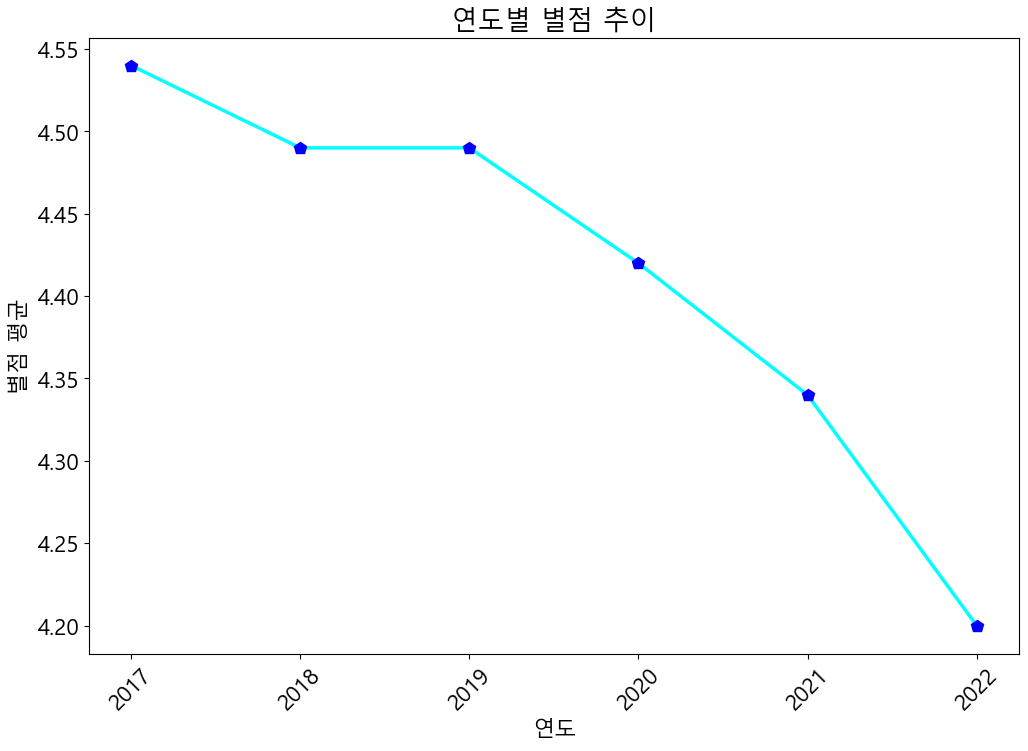

In [344]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(ratings['연도'], ratings['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('연도별 별점 추이')  # 그래프 제목 설정
plt.xlabel('연도')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

### 분기별

In [345]:
ratings2 = combined_ratings.groupby(['연도', '분기'])['별점'].mean().reset_index()
ratings2

,연도,분기,별점
0,2009,2009Q2,5.000000
1,2009,2009Q3,2.000000
2,2010,2010Q1,4.333333
3,2010,2010Q2,5.000000
4,2010,2010Q4,4.750000
5,2011,2011Q1,5.000000
6,2011,2011Q2,2.333333
7,2011,2011Q3,5.000000
8,2011,2011Q4,3.750000
9,2012,2012Q1,4.600000


In [346]:
ratings2 = ratings2[ratings2['연도'].astype(str).astype(int)>=2017]
ratings2['분기'] = ratings2['분기'].astype(str)
ratings2['별점'] = ratings2['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
ratings2

C:\Users\user\AppData\Local\Temp\ipykernel_14332\875704488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings2['분기'] = ratings2['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\875704488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings2['별점'] = ratings2['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)


,연도,분기,별점
29,2017,2017Q1,4.58
30,2017,2017Q2,4.69
31,2017,2017Q3,4.71
32,2017,2017Q4,4.45
33,2018,2018Q1,4.56
34,2018,2018Q2,4.39
35,2018,2018Q3,4.39
36,2018,2018Q4,4.50
37,2019,2019Q1,4.55
38,2019,2019Q2,4.38


#### 그래프

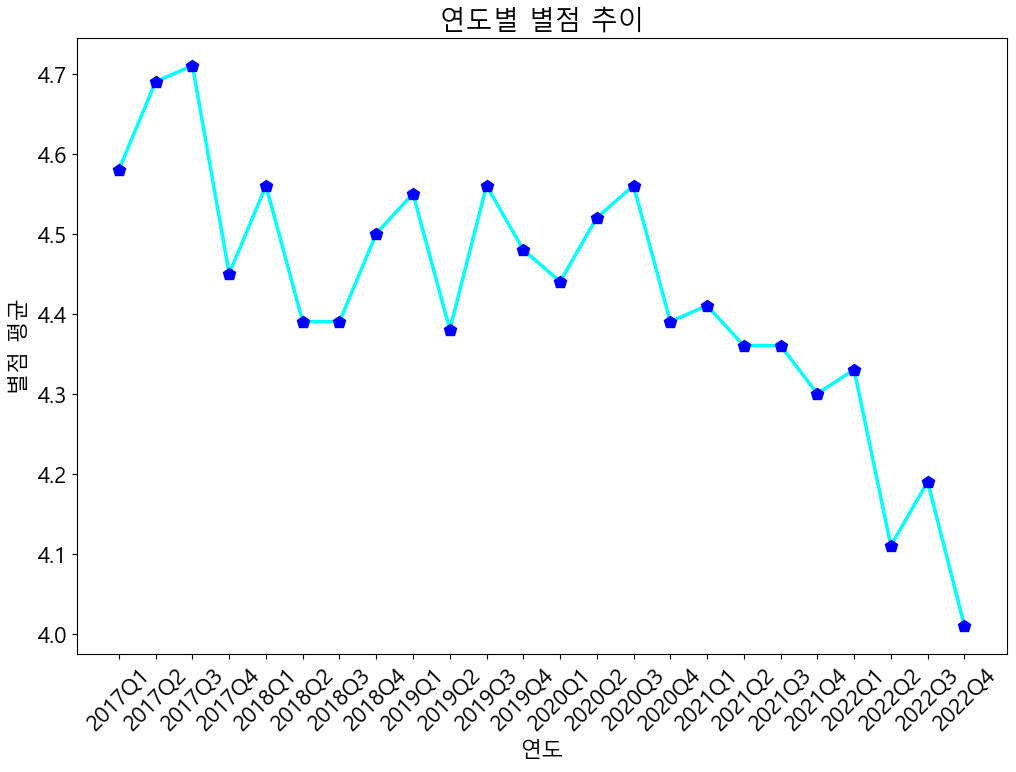

In [347]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(ratings2['분기'], ratings2['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('연도별 별점 추이')  # 그래프 제목 설정
plt.xlabel('연도')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

## 채널별

In [348]:
r1 = combined_ratings.groupby(['연도', '분기', '채널명']).mean().reset_index()
r1

,연도,분기,채널명,별점
0,2009,2009Q2,amazon,5.000000
1,2009,2009Q3,amazon,2.000000
2,2010,2010Q1,amazon,4.333333
3,2010,2010Q2,amazon,5.000000
4,2010,2010Q4,costco,4.750000
...,...,...,...,...
197,2022,2022Q4,build.com,4.142857
198,2022,2022Q4,costco,4.121387
199,2022,2022Q4,hd,4.071429
200,2022,2022Q4,lowes,4.285714


In [349]:
r1 = r1[r1['연도'].astype(str).astype(int)>=2017]
r1['연도'] = r1['연도'].astype(str)
r1['분기'] = r1['분기'].astype(str)
r1['별점'] = r1['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r1

C:\Users\user\AppData\Local\Temp\ipykernel_14332\250560765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1['연도'] = r1['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\250560765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1['분기'] = r1['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\250560765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,연도,분기,채널명,별점
73,2017,2017Q1,amazon,4.38
74,2017,2017Q1,build.com,4.65
75,2017,2017Q1,hd,4.64
76,2017,2017Q1,lowes,4.57
77,2017,2017Q1,walmart,4.65
...,...,...,...,...
197,2022,2022Q4,build.com,4.14
198,2022,2022Q4,costco,4.12
199,2022,2022Q4,hd,4.07
200,2022,2022Q4,lowes,4.29


In [350]:
r1['채널명'].unique()

array(['amazon', 'build.com', 'hd', 'lowes', 'walmart', 'costco'],
      dtype=object)

#### 그래프

<Figure size 2000x1600 with 0 Axes>

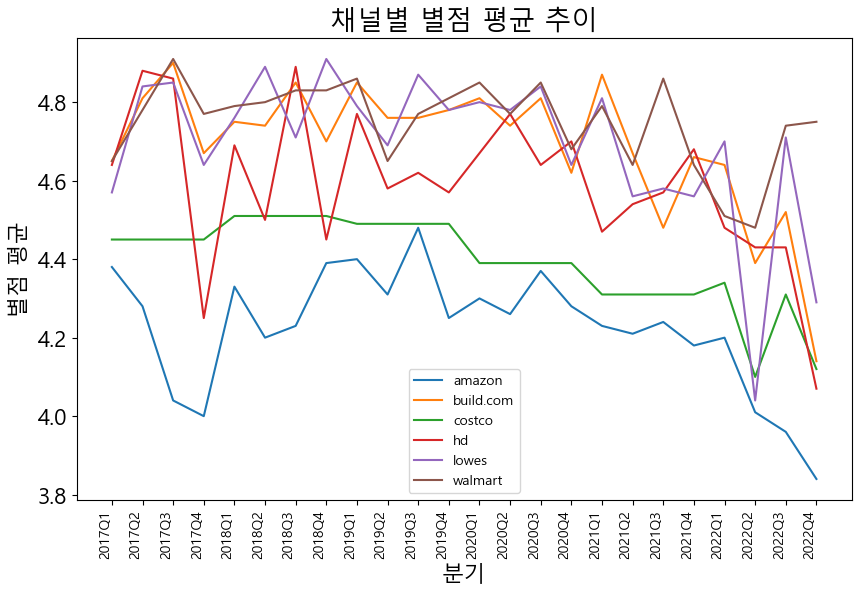

In [351]:
plt.figure(figsize=(20,16))  # 그래프 크기 설정
# pivot_table을 사용하여 데이터프레임 변형
df_pivot = r1.pivot_table(values='별점', index='분기', columns='채널명')
df_pivot['costco'].fillna(method='bfill', inplace=True)
df_pivot

# plot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(ax=ax)

# 그래프 꾸미기
ax.set_title('채널별 별점 평균 추이')
ax.set_xlabel('분기')
ax.set_ylabel('별점 평균')
ax.legend(fontsize=10)  # 범례 크기 조정
# x축 눈금 간격 조절
ax.xaxis.set_major_locator(plt.MaxNLocator(len(df_pivot.index)))

# x축 눈금 레이블 회전하기
plt.xticks(ticks=range(len(df_pivot.index)), labels=df_pivot.index, fontsize=10, rotation=90, ha='right')
plt.show()

#### 막대그래프
- 평점 1위 : 항상 Walmart
- 평점 2-3위 : Build.com과 Lowes
- 평점 최하위 : Amazon

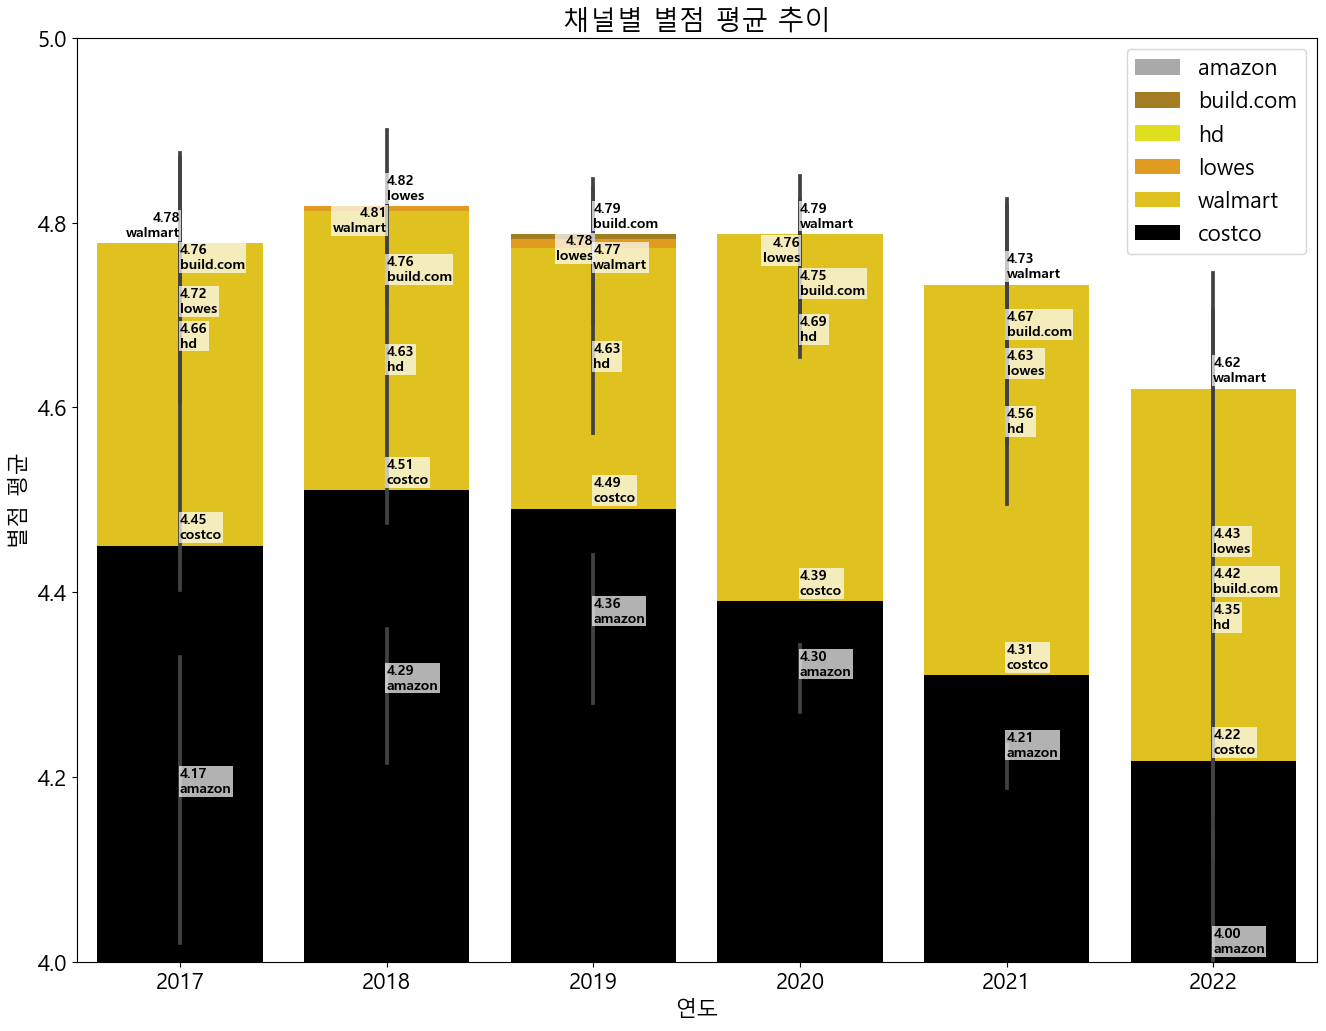

In [352]:
plt.figure(figsize=(16, 12))
# 채널별 색상 팔레트 지정
channel = {'costco':'black', 'amazon': 'darkgrey', 'build.com':'darkgoldenrod', 'walmart': 'gold', 'hd':'yellow', 'lowes':'orange'}
palette = sns.color_palette([channel[x] for x in r1['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=r1, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('채널별 별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

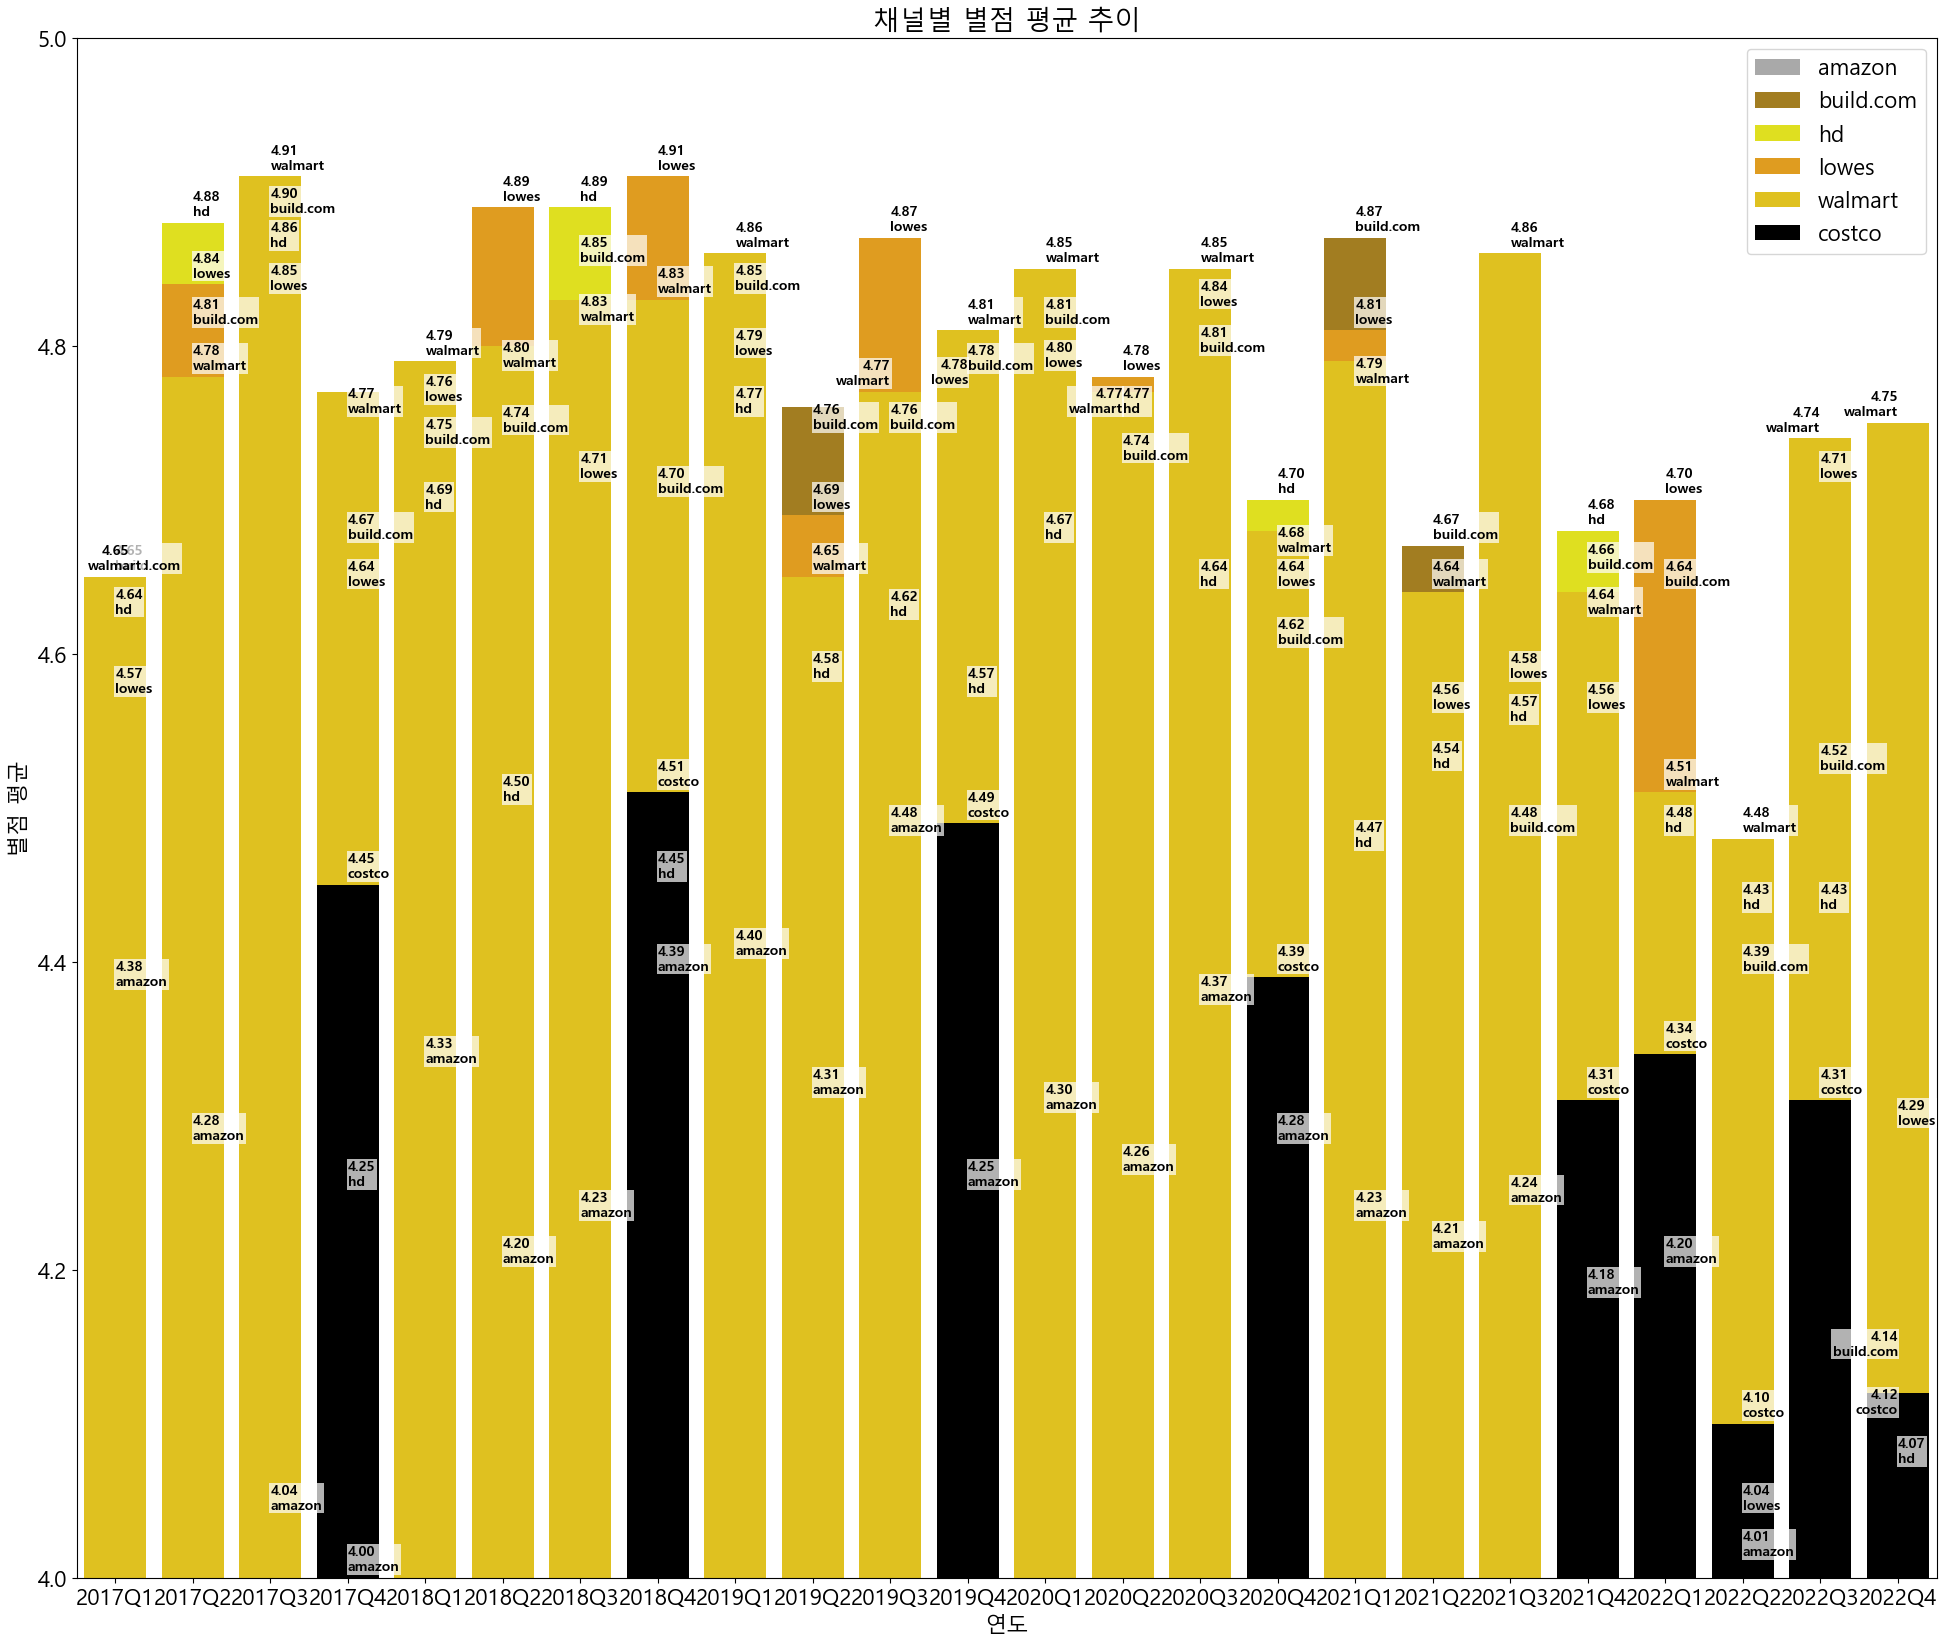

In [353]:
import adjustText

plt.figure(figsize=(24,20))
palette = sns.color_palette([channel[x] for x in r1['채널명'].unique()])
ax = sns.barplot(x='분기', y='별점', hue='채널명', data=r1, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('채널별 별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 코스트코

In [354]:
r2 = r1[r1['채널명']=='costco']
r2

,연도,분기,채널명,별점
90,2017,2017Q4,costco,4.45
111,2018,2018Q4,costco,4.51
132,2019,2019Q4,costco,4.49
153,2020,2020Q4,costco,4.39
174,2021,2021Q4,costco,4.31
180,2022,2022Q1,costco,4.34
186,2022,2022Q2,costco,4.10
192,2022,2022Q3,costco,4.31
198,2022,2022Q4,costco,4.12


In [355]:
r2 = r2[['분기', '별점']]
r2

,분기,별점
90,2017Q4,4.45
111,2018Q4,4.51
132,2019Q4,4.49
153,2020Q4,4.39
174,2021Q4,4.31
180,2022Q1,4.34
186,2022Q2,4.10
192,2022Q3,4.31
198,2022Q4,4.12


#### 그래프

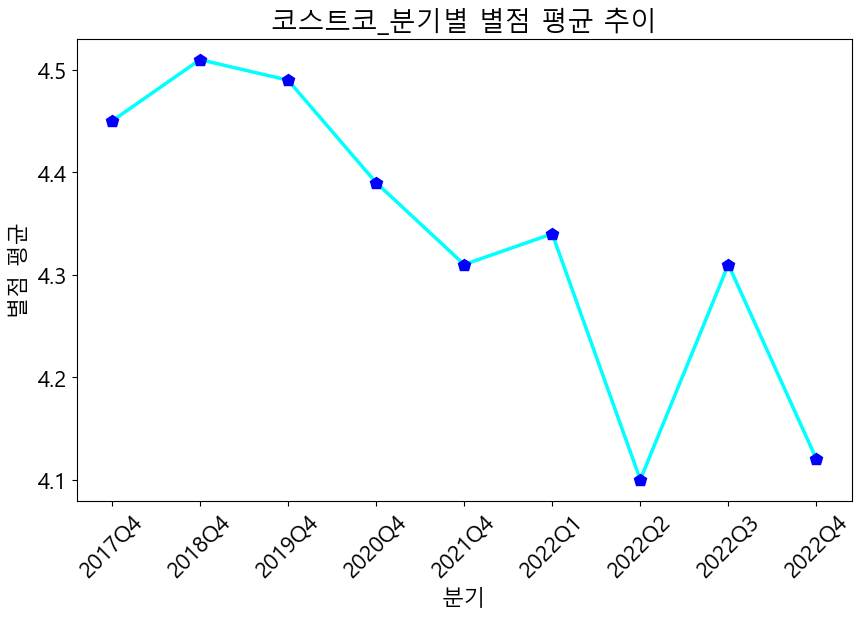

In [356]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r2['분기'], r2['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('코스트코_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [357]:
r22 = combined_ratings[combined_ratings['채널명']=='costco']
r22

,회사명,제품명,작성일,별점,채널명,연도,분기
6782,biobidet,BB Elite3,2020-11-29,5,costco,2020,2020Q4
6783,biobidet,BB Elite3,2018-11-30,4,costco,2018,2018Q4
6784,biobidet,BB Elite3,2020-11-29,5,costco,2020,2020Q4
6785,biobidet,BB Elite3,2019-11-30,5,costco,2019,2019Q4
6786,biobidet,BB Elite3,2020-11-29,5,costco,2020,2020Q4
...,...,...,...,...,...,...,...
24466,ovedecors,Irenne,2022-02-03,5,costco,2022,2022Q1
24467,ovedecors,Irenne,2022-06-03,5,costco,2022,2022Q2
24468,ovedecors,Irenne,2022-06-03,4,costco,2022,2022Q2
24469,ovedecors,Irenne,2020-11-30,5,costco,2020,2020Q4


In [358]:
r22 = r22.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r22

,연도,분기,회사명,별점
0,2010,2010Q4,brondell,4.750000
1,2011,2011Q4,brondell,4.666667
2,2012,2012Q4,biobidet,4.384615
3,2012,2012Q4,brondell,5.000000
4,2013,2013Q4,biobidet,4.482759
5,2013,2013Q4,brondell,5.000000
6,2014,2014Q4,biobidet,4.576271
7,2014,2014Q4,brondell,3.700000
8,2015,2015Q4,biobidet,4.402299
9,2015,2015Q4,brondell,4.176471


In [359]:
r22 = r22[r22['연도'].astype(str).astype(int)>=2017]
r22['연도'] = r22['연도'].astype(str)
r22['분기'] = r22['분기'].astype(str)
r22['별점'] = r22['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r22

C:\Users\user\AppData\Local\Temp\ipykernel_14332\4274208642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r22['연도'] = r22['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\4274208642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r22['분기'] = r22['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\4274208642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,연도,분기,회사명,별점
12,2017,2017Q4,biobidet,4.36
13,2017,2017Q4,brondell,4.54
14,2018,2018Q4,biobidet,4.51
15,2018,2018Q4,brondell,4.50
16,2019,2019Q4,biobidet,4.51
17,2019,2019Q4,brondell,4.47
18,2019,2019Q4,ovedecors,4.09
19,2020,2020Q4,biobidet,4.42
20,2020,2020Q4,brondell,4.30
21,2020,2020Q4,ovedecors,4.25


#### 막대그래프

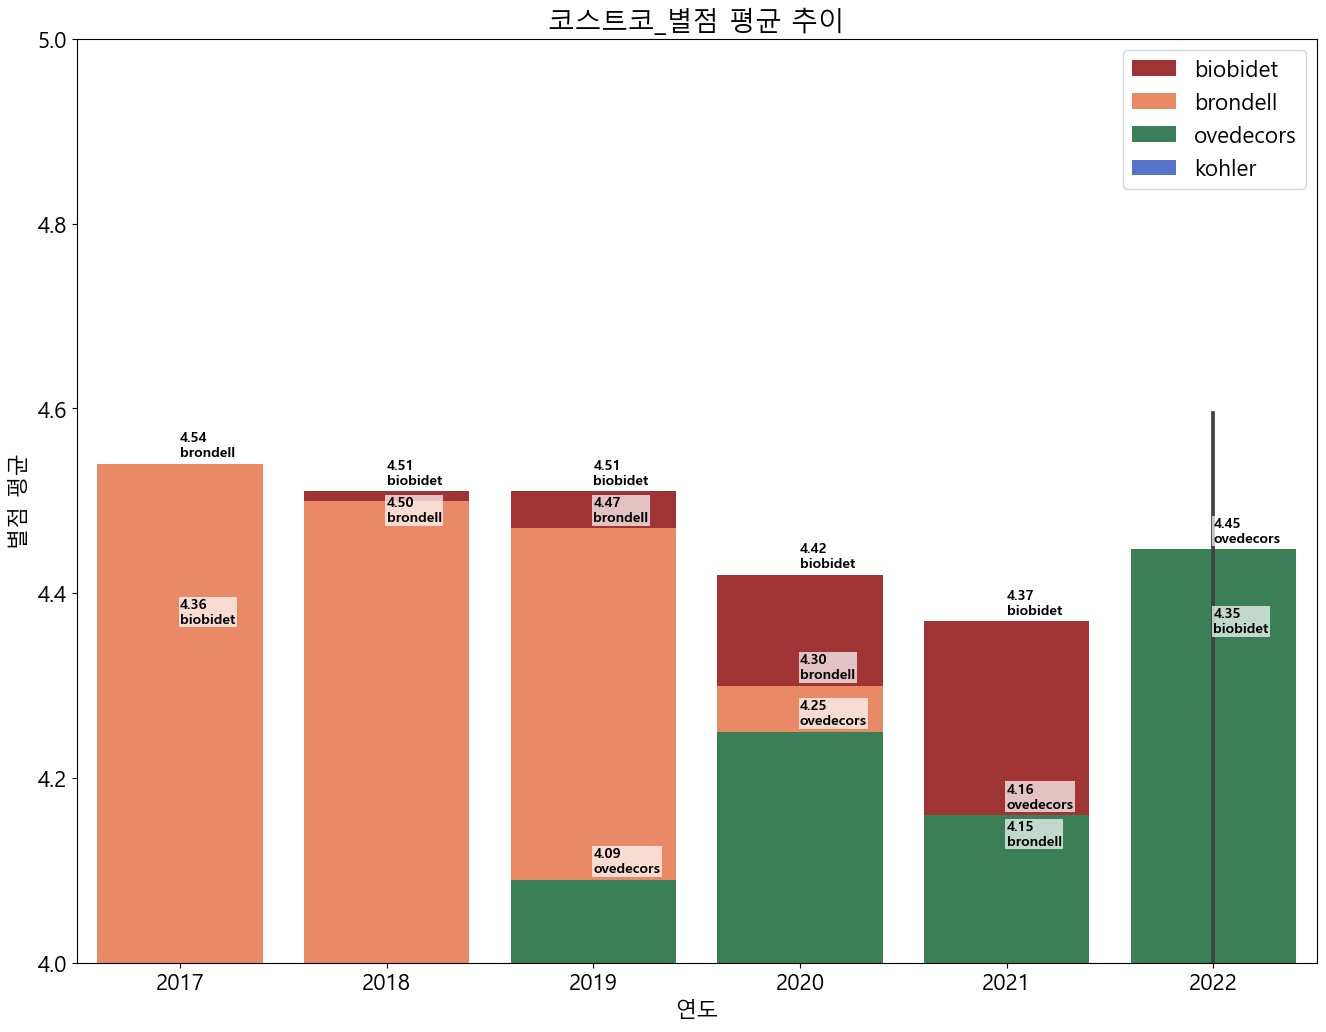

In [360]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r22['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r22, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('코스트코_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 코스트코 제외

In [361]:
r3 = r1[r1['채널명']!='costco']
r3

,연도,분기,채널명,별점
73,2017,2017Q1,amazon,4.38
74,2017,2017Q1,build.com,4.65
75,2017,2017Q1,hd,4.64
76,2017,2017Q1,lowes,4.57
77,2017,2017Q1,walmart,4.65
...,...,...,...,...
196,2022,2022Q4,amazon,3.84
197,2022,2022Q4,build.com,4.14
199,2022,2022Q4,hd,4.07
200,2022,2022Q4,lowes,4.29


In [362]:
r3 = r3.groupby('분기')[['별점']].mean().reset_index()
r3

,분기,별점
0,2017Q1,4.578
1,2017Q2,4.718
2,2017Q3,4.712
3,2017Q4,4.466
4,2018Q1,4.664
5,2018Q2,4.626
6,2018Q3,4.702
7,2018Q4,4.656
8,2019Q1,4.734
9,2019Q2,4.598


#### 그래프

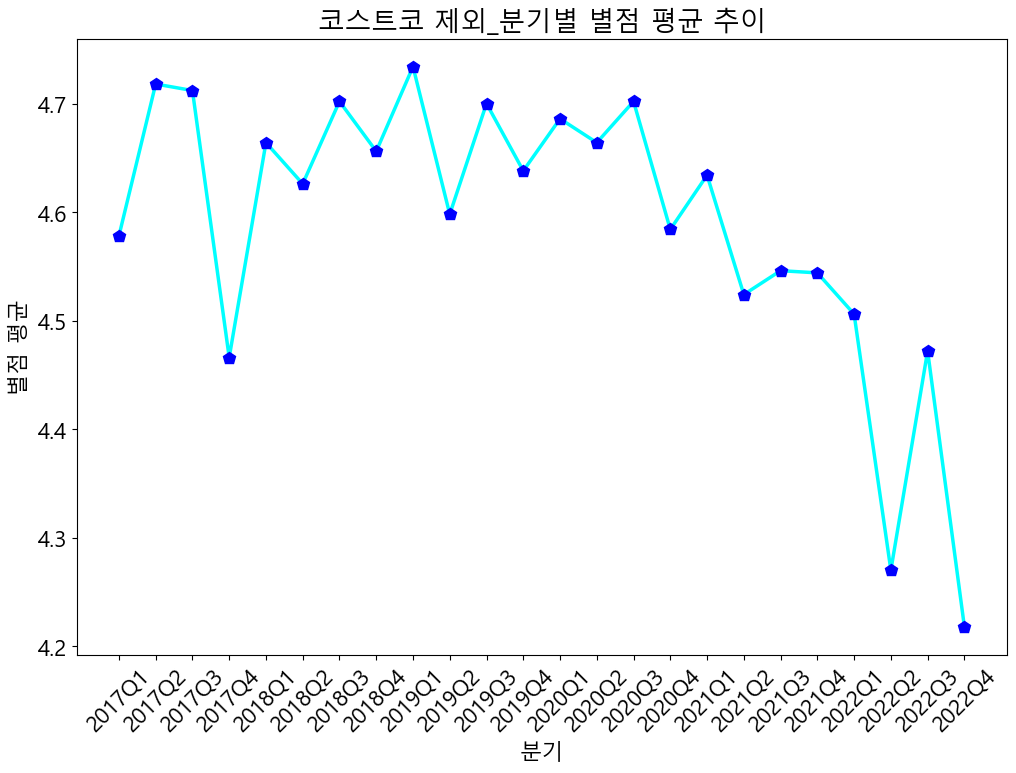

In [363]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r3['분기'], r3['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('코스트코 제외_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [364]:
r33 = combined_ratings[combined_ratings['채널명']!='costco']
r33

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,lowes,2019,2019Q4


In [365]:
r33 = r33.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r33

,연도,분기,회사명,별점
0,2009,2009Q2,biobidet,5.000000
1,2009,2009Q3,biobidet,2.000000
2,2010,2010Q1,biobidet,4.333333
3,2010,2010Q2,biobidet,5.000000
4,2011,2011Q1,biobidet,5.000000
...,...,...,...,...
224,2022,2022Q4,brondell,3.302326
225,2022,2022Q4,kohler,3.454545
226,2022,2022Q4,toto,4.202247
227,2022,2022Q4,tushy,3.818898


In [366]:
r33 = r33[r33['연도'].astype(str).astype(int)>=2017]
r33['연도'] = r33['연도'].astype(str)
r33['분기'] = r33['분기'].astype(str)
r33['별점'] = r33['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r33

C:\Users\user\AppData\Local\Temp\ipykernel_14332\2764864381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r33['연도'] = r33['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\2764864381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r33['분기'] = r33['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\2764864381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,연도,분기,회사명,별점
62,2017,2017Q1,alphabidet,5.00
63,2017,2017Q1,biobidet,4.57
64,2017,2017Q1,brondell,4.43
65,2017,2017Q1,kohler,5.00
66,2017,2017Q2,alphabidet,4.60
...,...,...,...,...
224,2022,2022Q4,brondell,3.30
225,2022,2022Q4,kohler,3.45
226,2022,2022Q4,toto,4.20
227,2022,2022Q4,tushy,3.82


#### 막대그래프

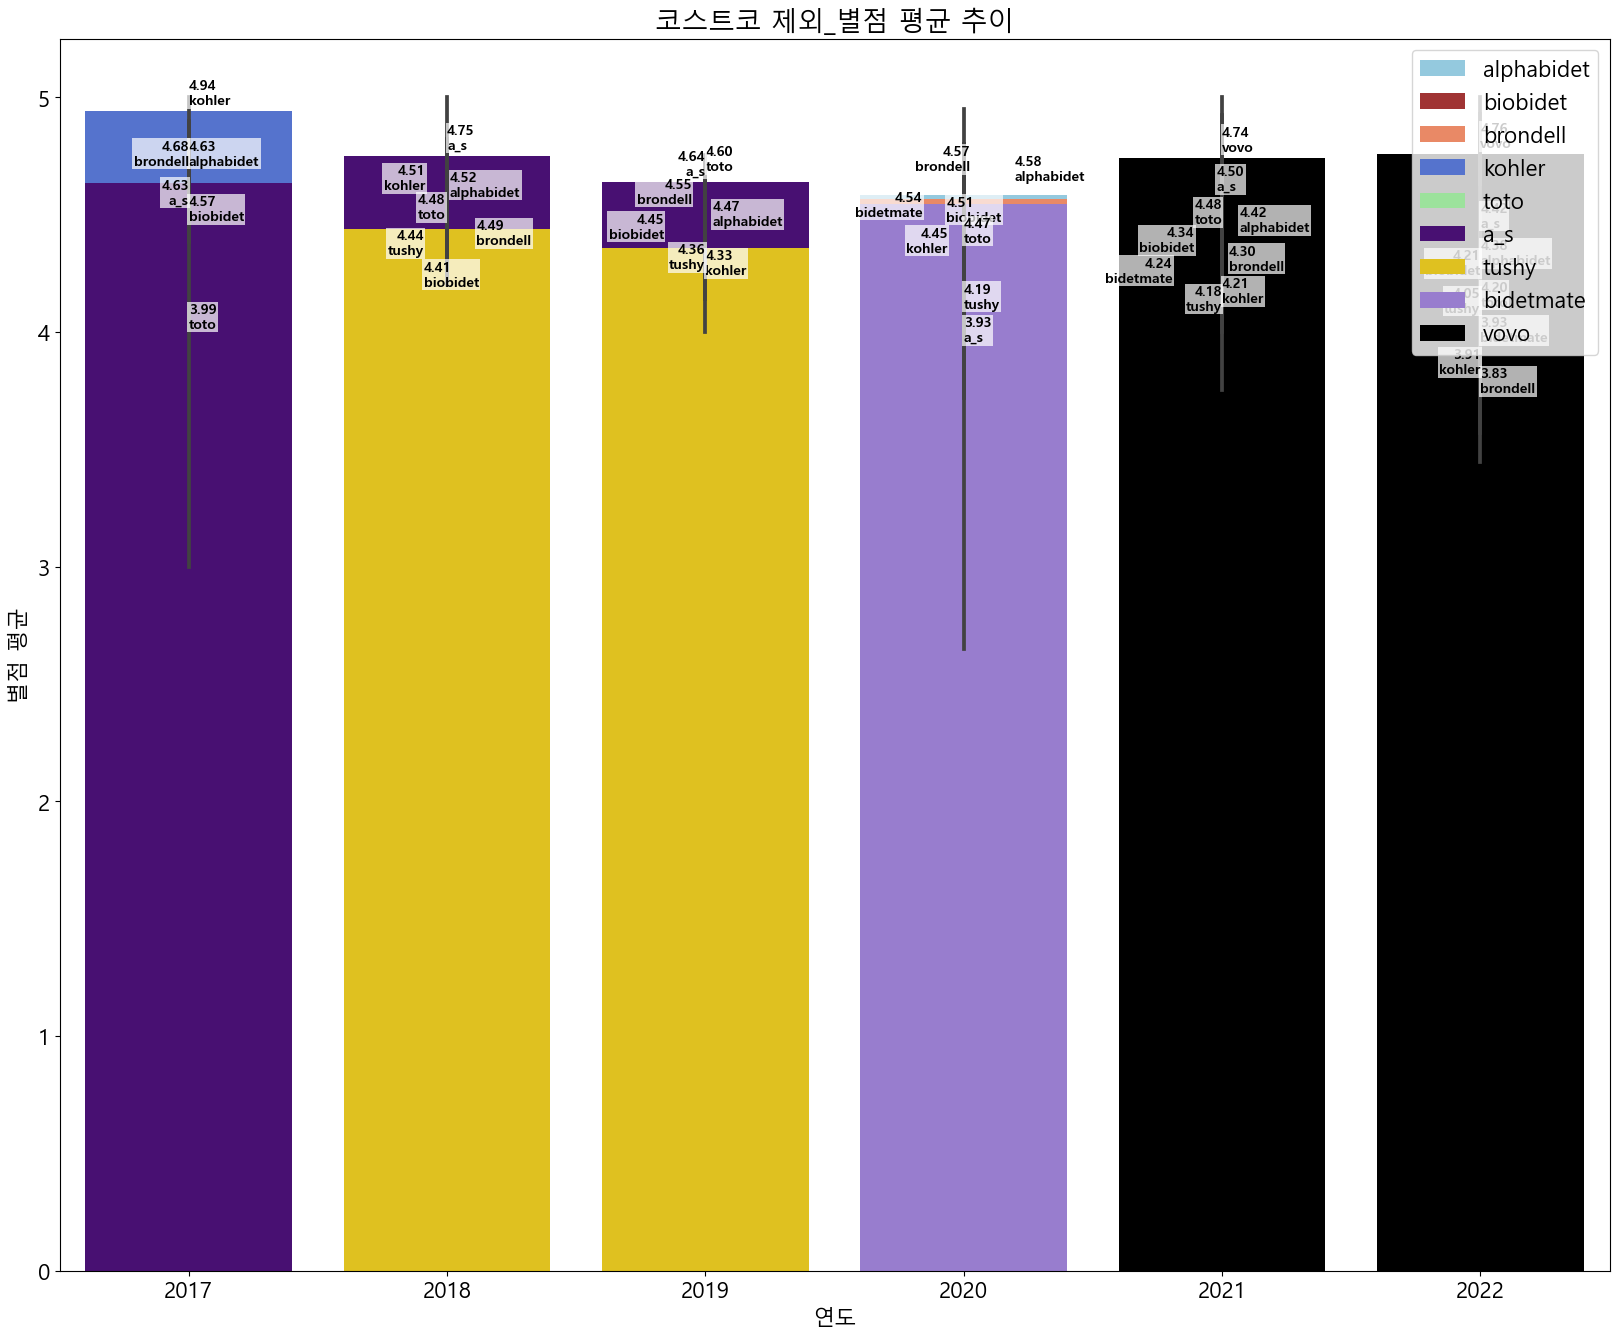

In [367]:
plt.figure(figsize=(20, 16))
palette = sns.color_palette([colors[x] for x in r33['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r33, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('코스트코 제외_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 아마존

In [368]:
r4 = r1[r1['채널명']=='walmart']
r4

,연도,분기,채널명,별점
77,2017,2017Q1,walmart,4.65
82,2017,2017Q2,walmart,4.78
87,2017,2017Q3,walmart,4.91
93,2017,2017Q4,walmart,4.77
98,2018,2018Q1,walmart,4.79
103,2018,2018Q2,walmart,4.80
108,2018,2018Q3,walmart,4.83
114,2018,2018Q4,walmart,4.83
119,2019,2019Q1,walmart,4.86
124,2019,2019Q2,walmart,4.65


In [369]:
r4 = r4[['분기', '별점']]
r4

,분기,별점
77,2017Q1,4.65
82,2017Q2,4.78
87,2017Q3,4.91
93,2017Q4,4.77
98,2018Q1,4.79
103,2018Q2,4.80
108,2018Q3,4.83
114,2018Q4,4.83
119,2019Q1,4.86
124,2019Q2,4.65


#### 그래프

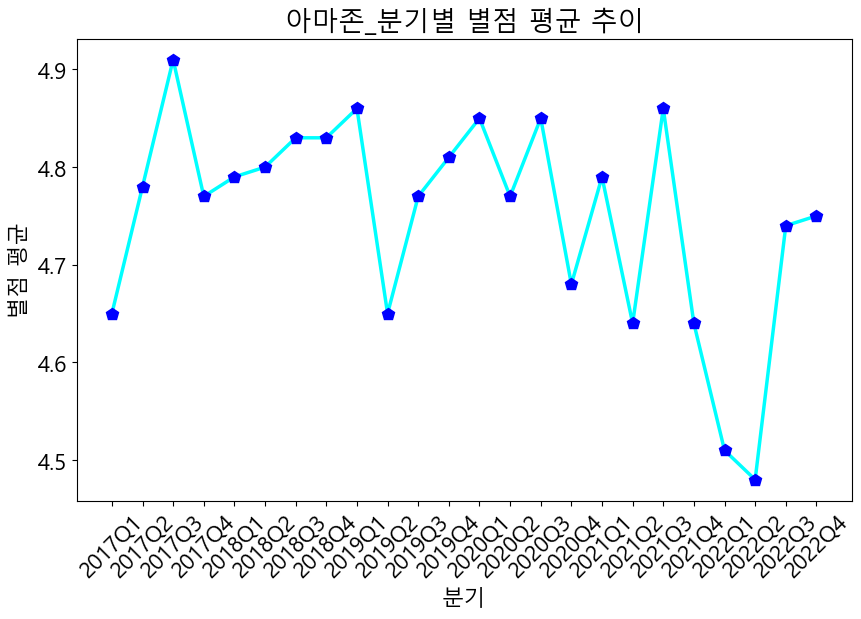

In [370]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r4['분기'], r4['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('아마존_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [371]:
r44 = combined_ratings[combined_ratings['채널명']=='amazon']
r44

,회사명,제품명,작성일,별점,채널명,연도,분기
98,brondell,SE600,2022-11-22,5,amazon,2022,2022Q4
99,brondell,SE600,2022-11-18,1,amazon,2022,2022Q4
100,brondell,SE600,2022-10-26,5,amazon,2022,2022Q4
101,brondell,SE600,2022-09-15,1,amazon,2022,2022Q3
102,brondell,SE600,2022-09-10,1,amazon,2022,2022Q3
...,...,...,...,...,...,...,...
30479,bidetmate,2000 Series,2022-03-24,5,amazon,2022,2022Q1
30480,bidetmate,2000 Series,2022-03-23,5,amazon,2022,2022Q1
30481,bidetmate,2000 Series,2022-03-17,5,amazon,2022,2022Q1
30482,bidetmate,2000 Series,2022-03-15,5,amazon,2022,2022Q1


In [372]:
r44 = r44.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r44

,연도,분기,회사명,별점
0,2009,2009Q2,biobidet,5.000000
1,2009,2009Q3,biobidet,2.000000
2,2010,2010Q1,biobidet,4.333333
3,2010,2010Q2,biobidet,5.000000
4,2011,2011Q1,biobidet,5.000000
...,...,...,...,...
165,2022,2022Q4,bidetmate,3.437500
166,2022,2022Q4,biobidet,3.622222
167,2022,2022Q4,brondell,3.257143
168,2022,2022Q4,toto,4.153846


In [373]:
r44 = r44[r44['연도'].astype(str).astype(int)>=2017]
r44['연도'] = r44['연도'].astype(str)
r44['분기'] = r44['분기'].astype(str)
r44['별점'] = r44['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r44

C:\Users\user\AppData\Local\Temp\ipykernel_14332\3829859784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r44['연도'] = r44['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\3829859784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r44['분기'] = r44['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\3829859784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,연도,분기,회사명,별점
47,2017,2017Q1,alphabidet,5.00
48,2017,2017Q1,biobidet,4.34
49,2017,2017Q2,alphabidet,4.60
50,2017,2017Q2,biobidet,4.14
51,2017,2017Q2,brondell,4.75
...,...,...,...,...
165,2022,2022Q4,bidetmate,3.44
166,2022,2022Q4,biobidet,3.62
167,2022,2022Q4,brondell,3.26
168,2022,2022Q4,toto,4.15


#### 막대그래프

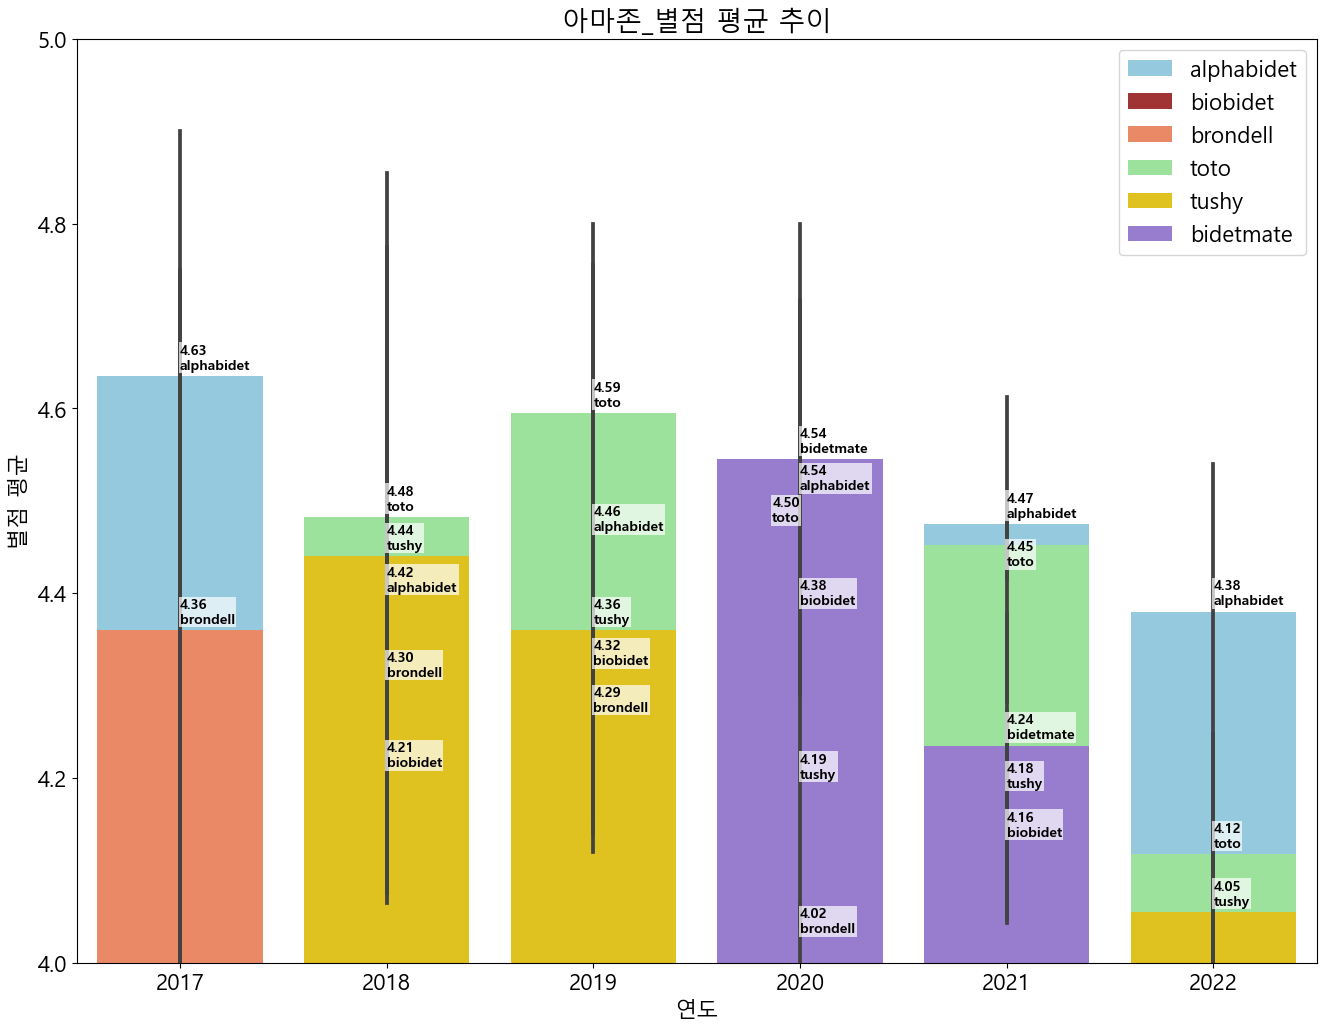

In [374]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r44['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r44, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('아마존_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 빌드컴

In [375]:
r5 = r1[r1['채널명']=='build.com']
r5

,연도,분기,채널명,별점
74,2017,2017Q1,build.com,4.65
79,2017,2017Q2,build.com,4.81
84,2017,2017Q3,build.com,4.90
89,2017,2017Q4,build.com,4.67
95,2018,2018Q1,build.com,4.75
100,2018,2018Q2,build.com,4.74
105,2018,2018Q3,build.com,4.85
110,2018,2018Q4,build.com,4.70
116,2019,2019Q1,build.com,4.85
121,2019,2019Q2,build.com,4.76


In [376]:
r5 = r5[['분기', '별점']]
r5

,분기,별점
74,2017Q1,4.65
79,2017Q2,4.81
84,2017Q3,4.90
89,2017Q4,4.67
95,2018Q1,4.75
100,2018Q2,4.74
105,2018Q3,4.85
110,2018Q4,4.70
116,2019Q1,4.85
121,2019Q2,4.76


#### 그래프

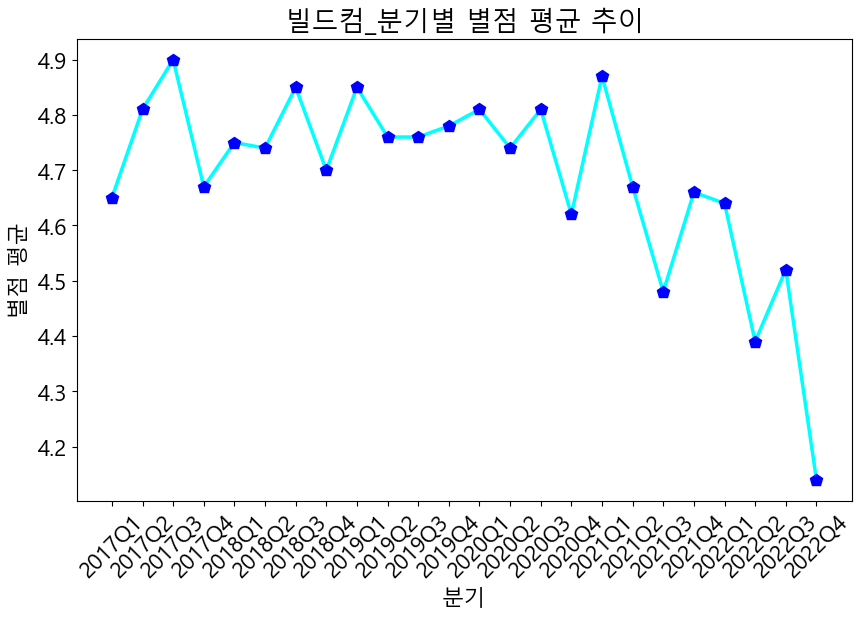

In [377]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r5['분기'], r5['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('빌드컴_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [378]:
r55 = combined_ratings[combined_ratings['채널명']=='build.com']
r55

,회사명,제품명,작성일,별점,채널명,연도,분기
2544,brondell,S1400,2017-04-27,5,build.com,2017,2017Q2
2545,brondell,S1400,2017-04-28,5,build.com,2017,2017Q2
2546,brondell,S1400,2017-04-29,5,build.com,2017,2017Q2
2547,brondell,S1400,2017-04-29,5,build.com,2017,2017Q2
2548,brondell,S1400,2017-05-06,5,build.com,2017,2017Q2
...,...,...,...,...,...,...,...
30894,toto,SW3046 S500,2022-01-21,5,build.com,2022,2022Q1
30895,toto,SW3046 S500,2022-04-10,5,build.com,2022,2022Q2
30896,toto,SW3046 S500,2022-05-04,5,build.com,2022,2022Q2
30897,toto,SW3046 S500,2022-06-17,5,build.com,2022,2022Q2


In [379]:
r55 = r55.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r55

,연도,분기,회사명,별점
0,2015,2015Q1,biobidet,5.000000
1,2015,2015Q2,biobidet,4.655172
2,2015,2015Q3,biobidet,4.500000
3,2015,2015Q3,kohler,4.500000
4,2015,2015Q4,biobidet,5.000000
...,...,...,...,...
95,2022,2022Q3,kohler,3.800000
96,2022,2022Q3,toto,4.800000
97,2022,2022Q4,biobidet,4.857143
98,2022,2022Q4,kohler,3.555556


In [380]:
r55 = r55[r55['연도'].astype(str).astype(int)>=2017]
r55['연도'] = r55['연도'].astype(str)
r55['분기'] = r55['분기'].astype(str)
r55['별점'] = r55['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r55

C:\Users\user\AppData\Local\Temp\ipykernel_14332\85312824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r55['연도'] = r55['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\85312824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r55['분기'] = r55['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\85312824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,연도,분기,회사명,별점
10,2017,2017Q1,biobidet,4.65
11,2017,2017Q1,kohler,5.00
12,2017,2017Q2,biobidet,4.78
13,2017,2017Q2,brondell,5.00
14,2017,2017Q3,a_s,4.75
...,...,...,...,...
95,2022,2022Q3,kohler,3.80
96,2022,2022Q3,toto,4.80
97,2022,2022Q4,biobidet,4.86
98,2022,2022Q4,kohler,3.56


#### 막대그래프

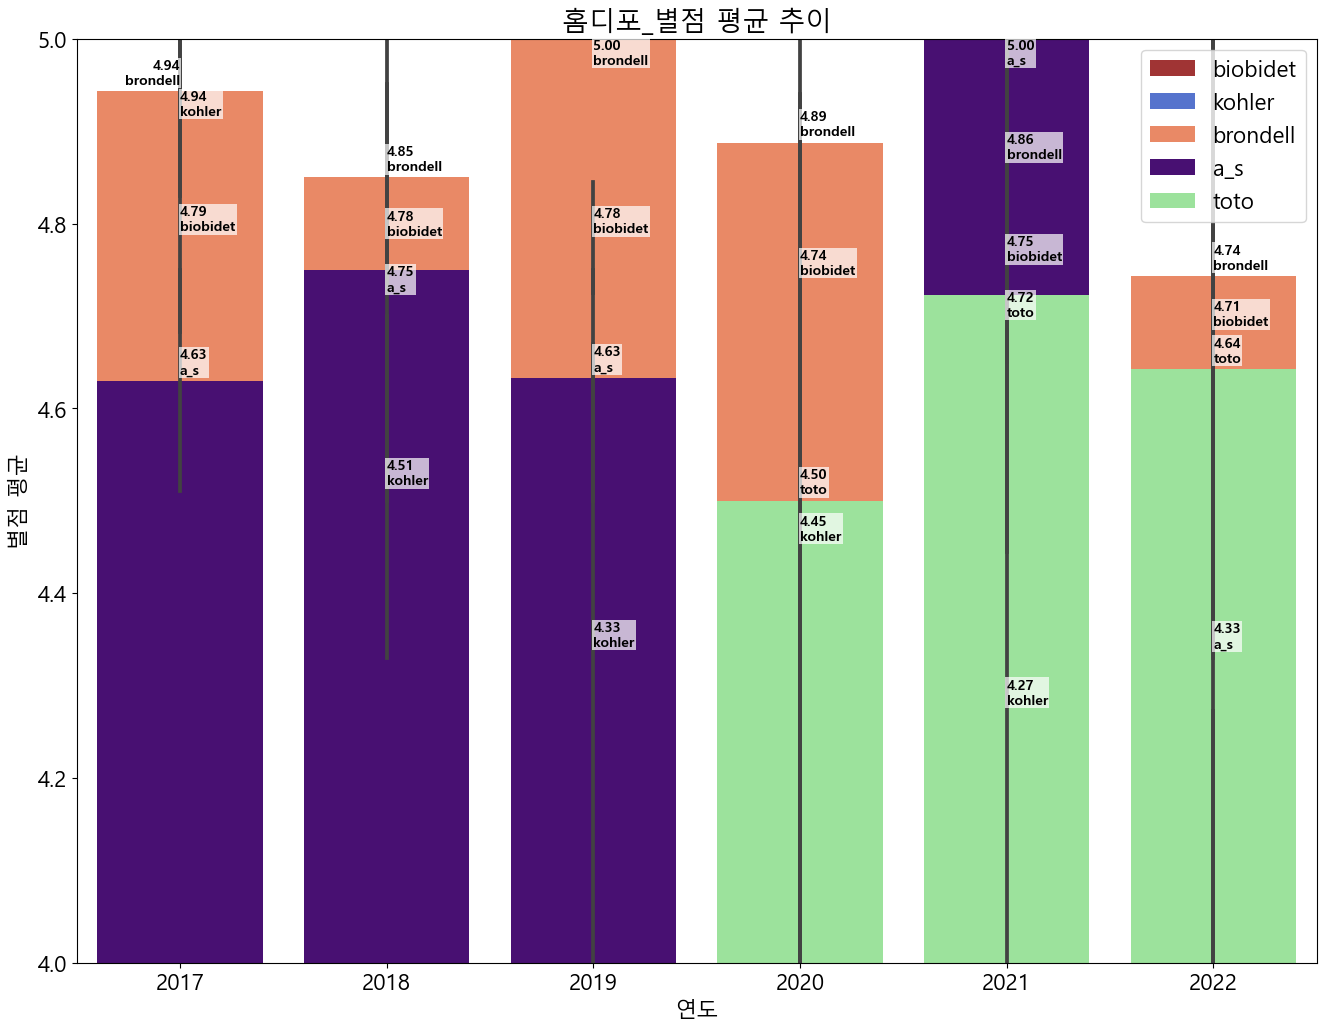

In [381]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r55['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r55, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('홈디포_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 홈디포

In [382]:
r6 = r1[r1['채널명']=='hd']
r6

,연도,분기,채널명,별점
75,2017,2017Q1,hd,4.64
80,2017,2017Q2,hd,4.88
85,2017,2017Q3,hd,4.86
91,2017,2017Q4,hd,4.25
96,2018,2018Q1,hd,4.69
101,2018,2018Q2,hd,4.50
106,2018,2018Q3,hd,4.89
112,2018,2018Q4,hd,4.45
117,2019,2019Q1,hd,4.77
122,2019,2019Q2,hd,4.58


In [383]:
r6 = r6[['분기', '별점']]
r6

,분기,별점
75,2017Q1,4.64
80,2017Q2,4.88
85,2017Q3,4.86
91,2017Q4,4.25
96,2018Q1,4.69
101,2018Q2,4.50
106,2018Q3,4.89
112,2018Q4,4.45
117,2019Q1,4.77
122,2019Q2,4.58


#### 그래프

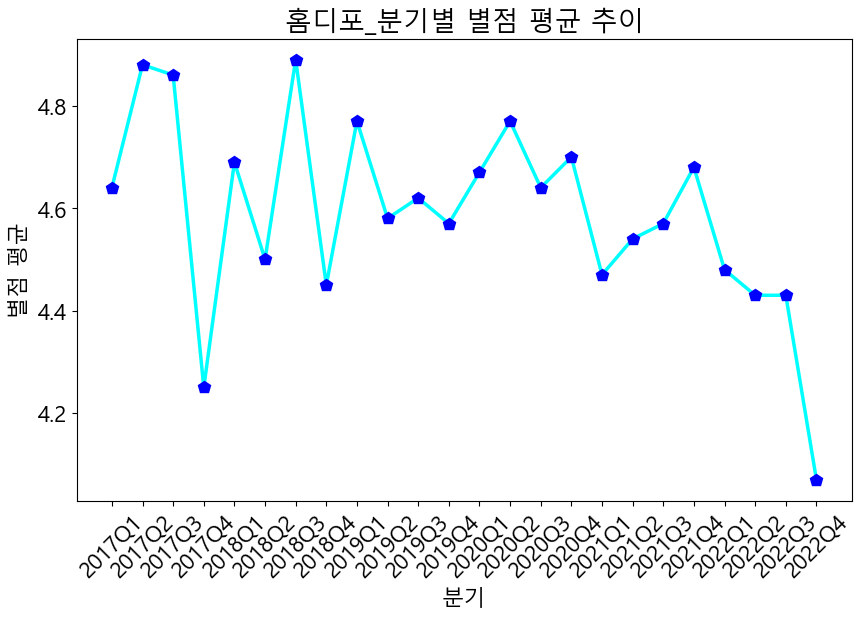

In [384]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r6['분기'], r6['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('홈디포_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [385]:
r55 = combined_ratings[combined_ratings['채널명']=='hd']
r55

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,hd,2018,2018Q1
...,...,...,...,...,...,...,...
6404,toto,SW3084 C5,2022-10-14,5,hd,2022,2022Q4
6405,toto,SW3084 C5,2022-10-16,5,hd,2022,2022Q4
6406,toto,SW3084 C5,2022-10-27,5,hd,2022,2022Q4
6407,toto,SW3084 C5,2022-11-09,4,hd,2022,2022Q4


In [386]:
r55 = r55.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r55

,연도,분기,회사명,별점
0,2012,2012Q3,biobidet,5.000000
1,2013,2013Q1,biobidet,5.000000
2,2013,2013Q2,biobidet,1.000000
3,2013,2013Q3,biobidet,5.000000
4,2014,2014Q2,biobidet,5.000000
...,...,...,...,...
82,2022,2022Q3,toto,4.750000
83,2022,2022Q4,alphabidet,4.500000
84,2022,2022Q4,biobidet,5.000000
85,2022,2022Q4,brondell,2.800000


In [387]:
r55 = r55[r55['연도'].astype(str).astype(int)>=2017]
r55['연도'] = r55['연도'].astype(str)
r55['분기'] = r55['분기'].astype(str)
r55['별점'] = r55['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r55

C:\Users\user\AppData\Local\Temp\ipykernel_14332\85312824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r55['연도'] = r55['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\85312824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r55['분기'] = r55['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\85312824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,연도,분기,회사명,별점
12,2017,2017Q1,biobidet,4.64
13,2017,2017Q2,biobidet,4.80
14,2017,2017Q2,brondell,5.00
15,2017,2017Q3,biobidet,4.92
16,2017,2017Q3,brondell,4.84
...,...,...,...,...
82,2022,2022Q3,toto,4.75
83,2022,2022Q4,alphabidet,4.50
84,2022,2022Q4,biobidet,5.00
85,2022,2022Q4,brondell,2.80


#### 막대그래프

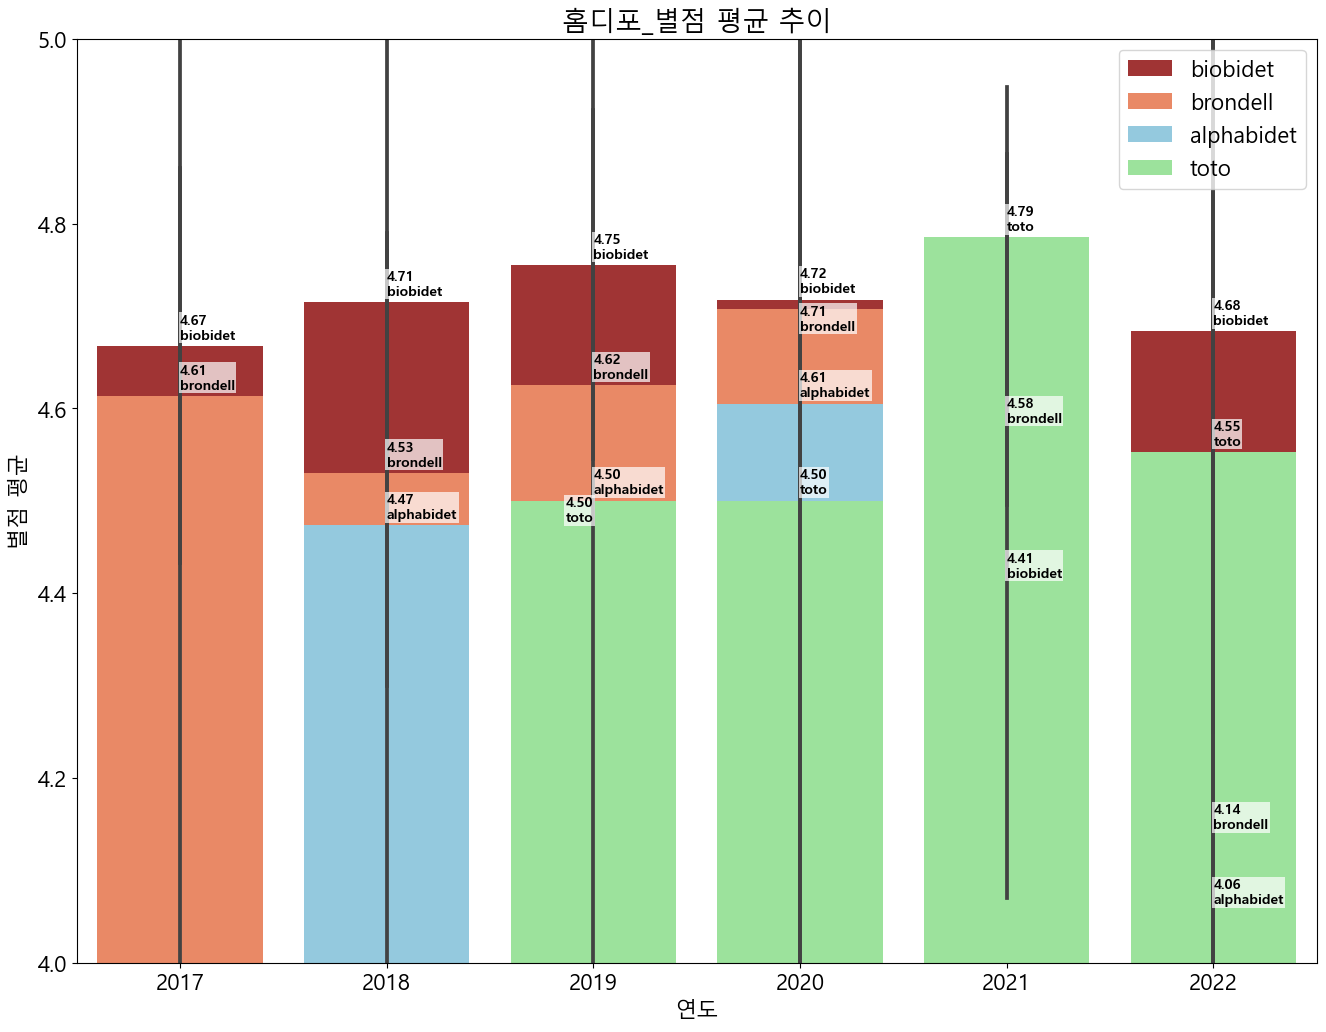

In [388]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r55['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r55, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('홈디포_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 로우스

In [389]:
r7 = r1[r1['채널명']=='lowes']
r7

,연도,분기,채널명,별점
76,2017,2017Q1,lowes,4.57
81,2017,2017Q2,lowes,4.84
86,2017,2017Q3,lowes,4.85
92,2017,2017Q4,lowes,4.64
97,2018,2018Q1,lowes,4.76
102,2018,2018Q2,lowes,4.89
107,2018,2018Q3,lowes,4.71
113,2018,2018Q4,lowes,4.91
118,2019,2019Q1,lowes,4.79
123,2019,2019Q2,lowes,4.69


In [390]:
r7 = r7[['분기', '별점']]
r7

,분기,별점
76,2017Q1,4.57
81,2017Q2,4.84
86,2017Q3,4.85
92,2017Q4,4.64
97,2018Q1,4.76
102,2018Q2,4.89
107,2018Q3,4.71
113,2018Q4,4.91
118,2019Q1,4.79
123,2019Q2,4.69


#### 그래프

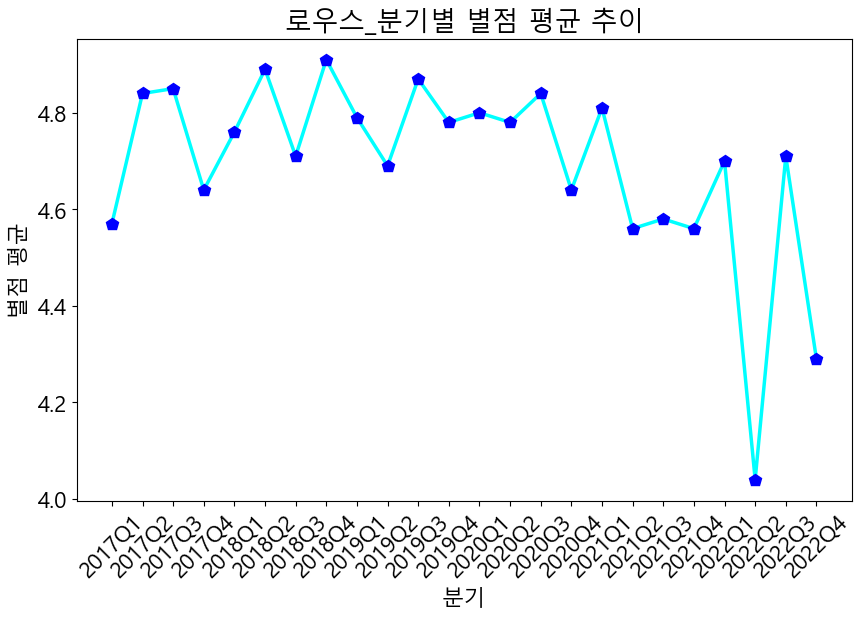

In [391]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r7['분기'], r7['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('로우스_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [392]:
r77 = combined_ratings[combined_ratings['채널명']=='lowes']
r77

,회사명,제품명,작성일,별점,채널명,연도,분기
2812,brondell,S1400,2018-11-12,4,lowes,2018,2018Q4
2813,brondell,S1400,2020-04-29,5,lowes,2020,2020Q2
2814,brondell,S1400,2020-11-24,5,lowes,2020,2020Q4
2815,brondell,S1400,2021-02-12,4,lowes,2021,2021Q1
2816,brondell,S1400,2021-08-20,3,lowes,2021,2021Q3
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,lowes,2019,2019Q4


In [393]:
r77 = r77.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r77

,연도,분기,회사명,별점
0,2012,2012Q1,brondell,3.000000
1,2014,2014Q1,brondell,5.000000
2,2014,2014Q3,brondell,4.916667
3,2014,2014Q4,brondell,5.000000
4,2015,2015Q1,biobidet,5.000000
...,...,...,...,...
91,2022,2022Q3,vovo,4.722222
92,2022,2022Q4,biobidet,5.000000
93,2022,2022Q4,brondell,4.500000
94,2022,2022Q4,kohler,3.000000


In [394]:
r77 = r77[r77['연도'].astype(str).astype(int)>=2017]
r77['연도'] = r77['연도'].astype(str)
r77['분기'] = r77['분기'].astype(str)
r77['별점'] = r77['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r77

C:\Users\user\AppData\Local\Temp\ipykernel_14332\3852729673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r77['연도'] = r77['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\3852729673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r77['분기'] = r77['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\3852729673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,연도,분기,회사명,별점
18,2017,2017Q1,biobidet,4.61
19,2017,2017Q1,brondell,4.43
20,2017,2017Q2,biobidet,4.67
21,2017,2017Q2,brondell,5.00
22,2017,2017Q3,a_s,4.75
...,...,...,...,...
91,2022,2022Q3,vovo,4.72
92,2022,2022Q4,biobidet,5.00
93,2022,2022Q4,brondell,4.50
94,2022,2022Q4,kohler,3.00


#### 막대그래프

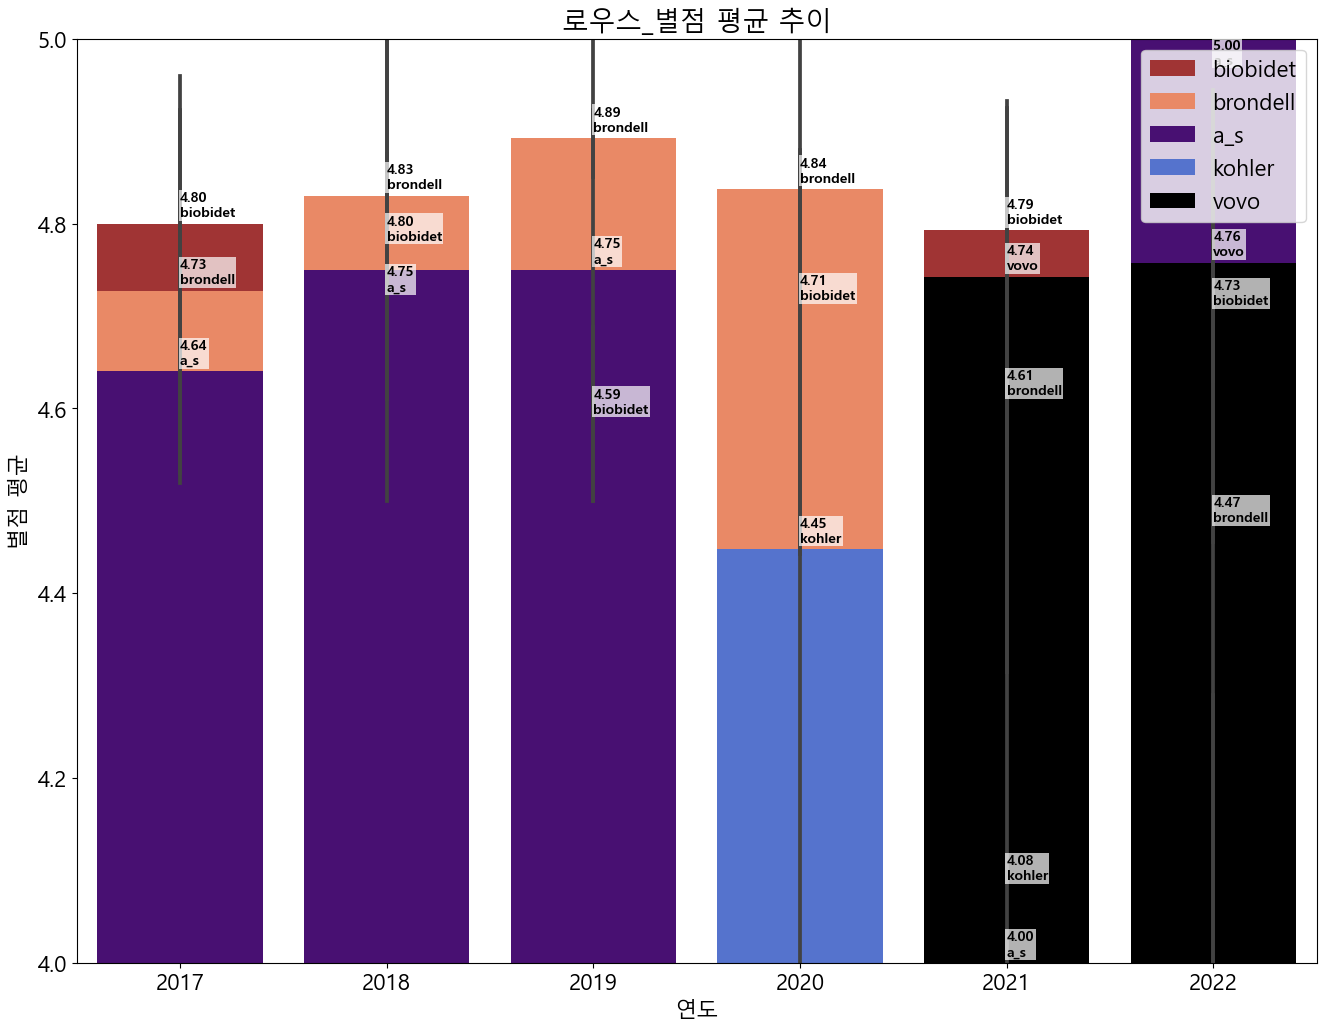

In [395]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r77['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r77, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('로우스_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 월마트

In [396]:
r8 = r1[r1['채널명']=='walmart']
r8

,연도,분기,채널명,별점
77,2017,2017Q1,walmart,4.65
82,2017,2017Q2,walmart,4.78
87,2017,2017Q3,walmart,4.91
93,2017,2017Q4,walmart,4.77
98,2018,2018Q1,walmart,4.79
103,2018,2018Q2,walmart,4.80
108,2018,2018Q3,walmart,4.83
114,2018,2018Q4,walmart,4.83
119,2019,2019Q1,walmart,4.86
124,2019,2019Q2,walmart,4.65


In [397]:
r8 = r8[['분기', '별점']]
r8

,분기,별점
77,2017Q1,4.65
82,2017Q2,4.78
87,2017Q3,4.91
93,2017Q4,4.77
98,2018Q1,4.79
103,2018Q2,4.80
108,2018Q3,4.83
114,2018Q4,4.83
119,2019Q1,4.86
124,2019Q2,4.65


#### 그래프

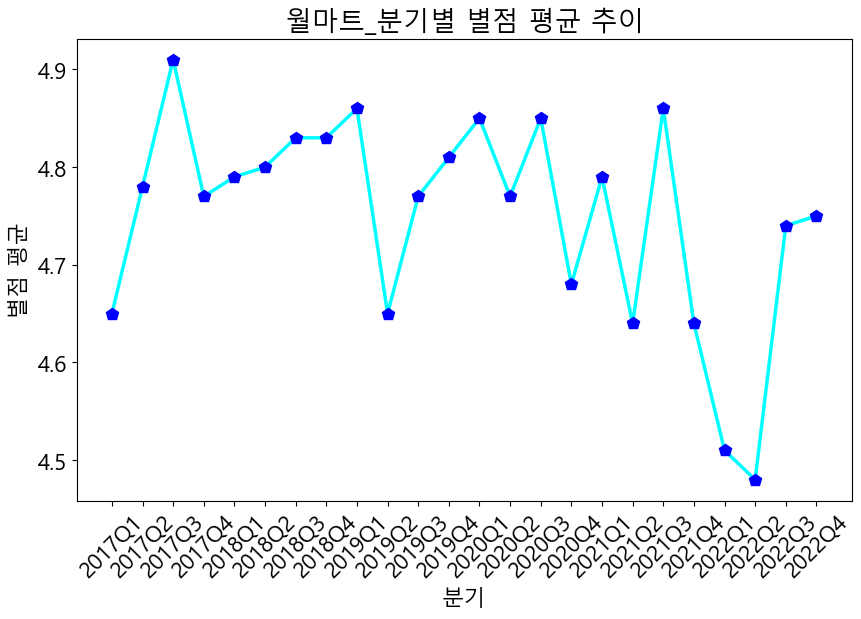

In [398]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r8['분기'], r8['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('월마트_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [399]:
r88 = combined_ratings[combined_ratings['채널명']=='walmart']
r88

,회사명,제품명,작성일,별점,채널명,연도,분기
1610,brondell,S1400,2018-01-12,5,walmart,2018,2018Q1
1611,brondell,S1400,2020-01-12,5,walmart,2020,2020Q1
1612,brondell,S1400,2020-01-13,5,walmart,2020,2020Q1
1613,brondell,S1400,2018-01-14,5,walmart,2018,2018Q1
1614,brondell,S1400,2021-01-14,5,walmart,2021,2021Q1
...,...,...,...,...,...,...,...
27343,brondell,EM617,2021-07-24,5,walmart,2021,2021Q3
27344,brondell,EM617,2021-07-26,5,walmart,2021,2021Q3
27345,brondell,EM617,2021-07-30,4,walmart,2021,2021Q3
27346,brondell,EM617,2021-08-11,5,walmart,2021,2021Q3


In [400]:
r88 = r88.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r88

,연도,분기,회사명,별점
0,2015,2015Q1,biobidet,5.000000
1,2015,2015Q2,biobidet,4.666667
2,2015,2015Q3,biobidet,4.761905
3,2015,2015Q4,biobidet,5.000000
4,2016,2016Q1,biobidet,4.666667
5,2016,2016Q3,biobidet,4.729167
6,2016,2016Q4,biobidet,4.763889
7,2017,2017Q1,biobidet,4.646341
8,2017,2017Q2,biobidet,4.745455
9,2017,2017Q2,brondell,5.000000


In [401]:
r88 = r88[r88['연도'].astype(str).astype(int)>=2017]
r88['연도'] = r88['연도'].astype(str)
r88['분기'] = r88['분기'].astype(str)
r88['별점'] = r88['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r88

C:\Users\user\AppData\Local\Temp\ipykernel_14332\4132920351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r88['연도'] = r88['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\4132920351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r88['분기'] = r88['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14332\4132920351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,연도,분기,회사명,별점
7,2017,2017Q1,biobidet,4.65
8,2017,2017Q2,biobidet,4.75
9,2017,2017Q2,brondell,5.00
10,2017,2017Q3,biobidet,4.97
11,2017,2017Q3,brondell,4.83
12,2017,2017Q4,biobidet,4.76
13,2017,2017Q4,brondell,5.00
14,2018,2018Q1,biobidet,4.72
15,2018,2018Q1,brondell,4.90
16,2018,2018Q2,biobidet,4.82


#### 막대그래프

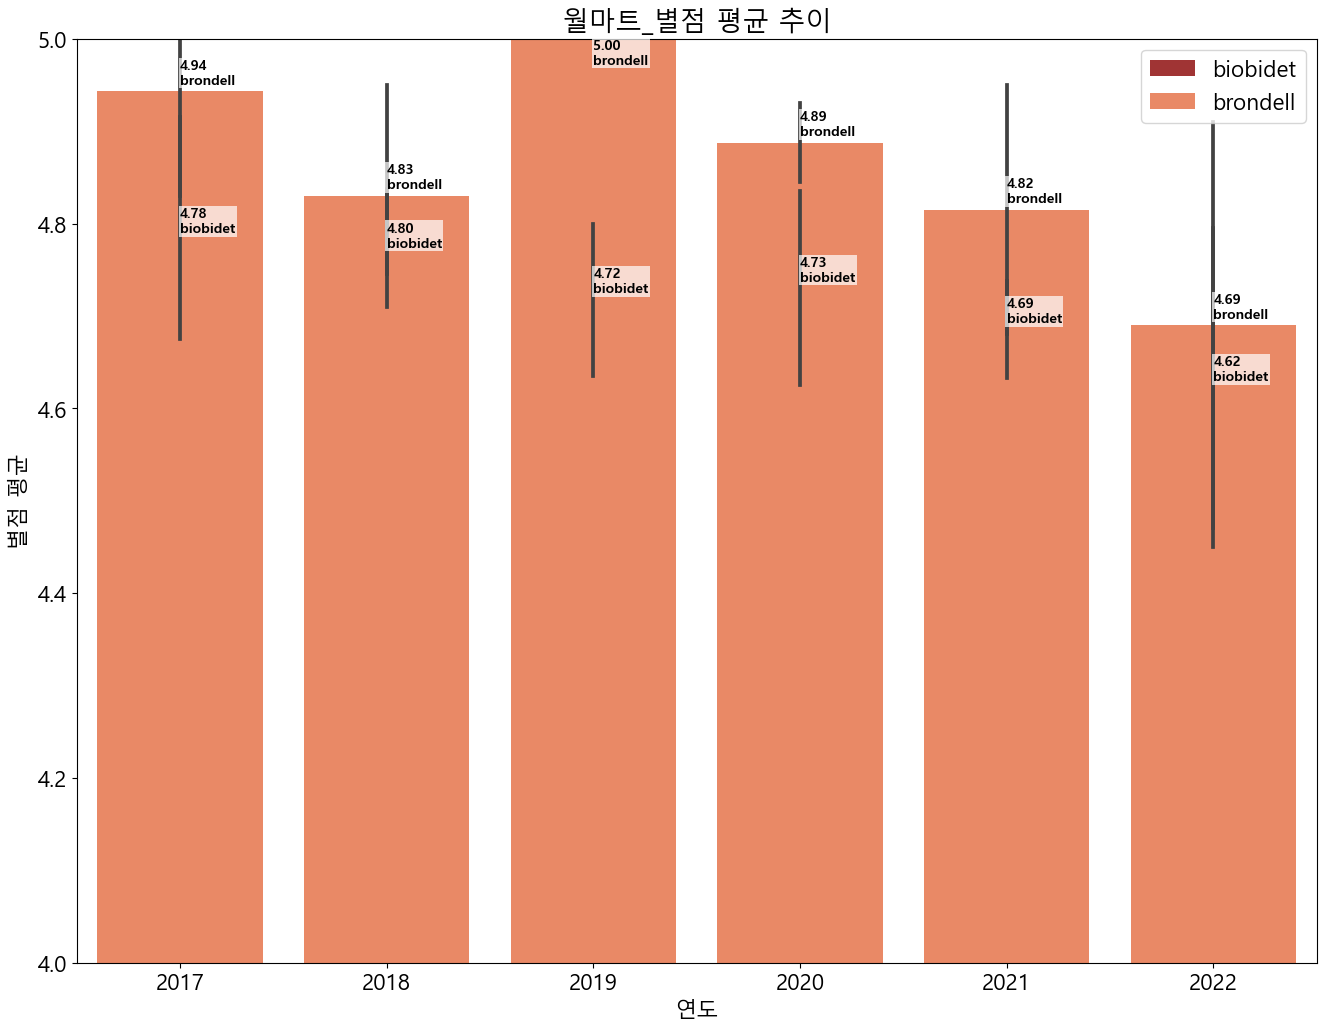

In [402]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r88['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r88, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('월마트_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

## 브랜드별

In [403]:
b = combined_ratings.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()[['연도', '분기', '회사명', '별점']]
b

,연도,분기,회사명,별점
0,2009,2009Q2,biobidet,5.000000
1,2009,2009Q3,biobidet,2.000000
2,2010,2010Q1,biobidet,4.333333
3,2010,2010Q2,biobidet,5.000000
4,2010,2010Q4,brondell,4.750000
...,...,...,...,...
235,2022,2022Q4,kohler,3.153846
236,2022,2022Q4,ovedecors,4.428571
237,2022,2022Q4,toto,4.202247
238,2022,2022Q4,tushy,3.818898


In [404]:
bb = b[b['연도'].astype(str).astype(int)>=2017]
bb

,연도,분기,회사명,별점
66,2017,2017Q1,alphabidet,5.000000
67,2017,2017Q1,biobidet,4.574007
68,2017,2017Q1,brondell,4.428571
69,2017,2017Q1,kohler,5.000000
70,2017,2017Q2,alphabidet,4.600000
...,...,...,...,...
235,2022,2022Q4,kohler,3.153846
236,2022,2022Q4,ovedecors,4.428571
237,2022,2022Q4,toto,4.202247
238,2022,2022Q4,tushy,3.818898


In [405]:
bb = bb.groupby(['분기', '회사명'])[['별점']].mean().reset_index()
bb

,분기,회사명,별점
0,2017Q1,alphabidet,5.000000
1,2017Q1,biobidet,4.574007
2,2017Q1,brondell,4.428571
3,2017Q1,kohler,5.000000
4,2017Q2,alphabidet,4.600000
...,...,...,...
169,2022Q4,kohler,3.153846
170,2022Q4,ovedecors,4.428571
171,2022Q4,toto,4.202247
172,2022Q4,tushy,3.818898


In [406]:
bb['분기'] = bb['분기'].astype(str)
bb['별점'] = bb['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
bb

,분기,회사명,별점
0,2017Q1,alphabidet,5.00
1,2017Q1,biobidet,4.57
2,2017Q1,brondell,4.43
3,2017Q1,kohler,5.00
4,2017Q2,alphabidet,4.60
...,...,...,...
169,2022Q4,kohler,3.15
170,2022Q4,ovedecors,4.43
171,2022Q4,toto,4.20
172,2022Q4,tushy,3.82


#### 그래프

<Figure size 2000x1600 with 0 Axes>

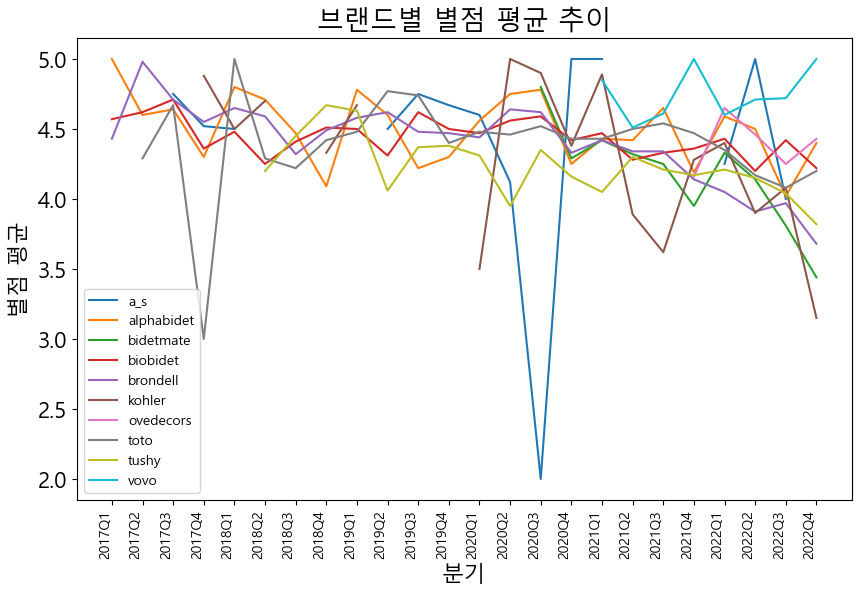

In [407]:
plt.figure(figsize=(20,16))  # 그래프 크기 설정
# pivot_table을 사용하여 데이터프레임 변형
df_pivot = bb.pivot_table(values='별점', index='분기', columns='회사명')

# plot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(ax=ax)

# 그래프 꾸미기
ax.set_title('브랜드별 별점 평균 추이')
ax.set_xlabel('분기')
ax.set_ylabel('별점 평균')
ax.legend(fontsize=10)  # 범례 크기 조정
# x축 눈금 간격 조절
ax.xaxis.set_major_locator(plt.MaxNLocator(len(df_pivot.index)))

# x축 눈금 레이블 회전하기
plt.xticks(ticks=range(len(df_pivot.index)), labels=df_pivot.index, fontsize=10, rotation=90, ha='right')
plt.show()

In [408]:
br = combined_ratings.groupby(['연도', '회사명'])[['별점']].mean().reset_index()[['연도', '회사명', '별점']]
br = br[br['연도'].astype(str).astype(int)>=2017]
br

,연도,회사명,별점
23,2017,a_s,4.542169
24,2017,alphabidet,4.571429
25,2017,biobidet,4.500969
26,2017,brondell,4.614458
27,2017,kohler,4.882353
28,2017,toto,4.000000
29,2018,a_s,4.666667
30,2018,alphabidet,4.447368
31,2018,biobidet,4.491717
32,2018,brondell,4.499062


#### 막대그래프

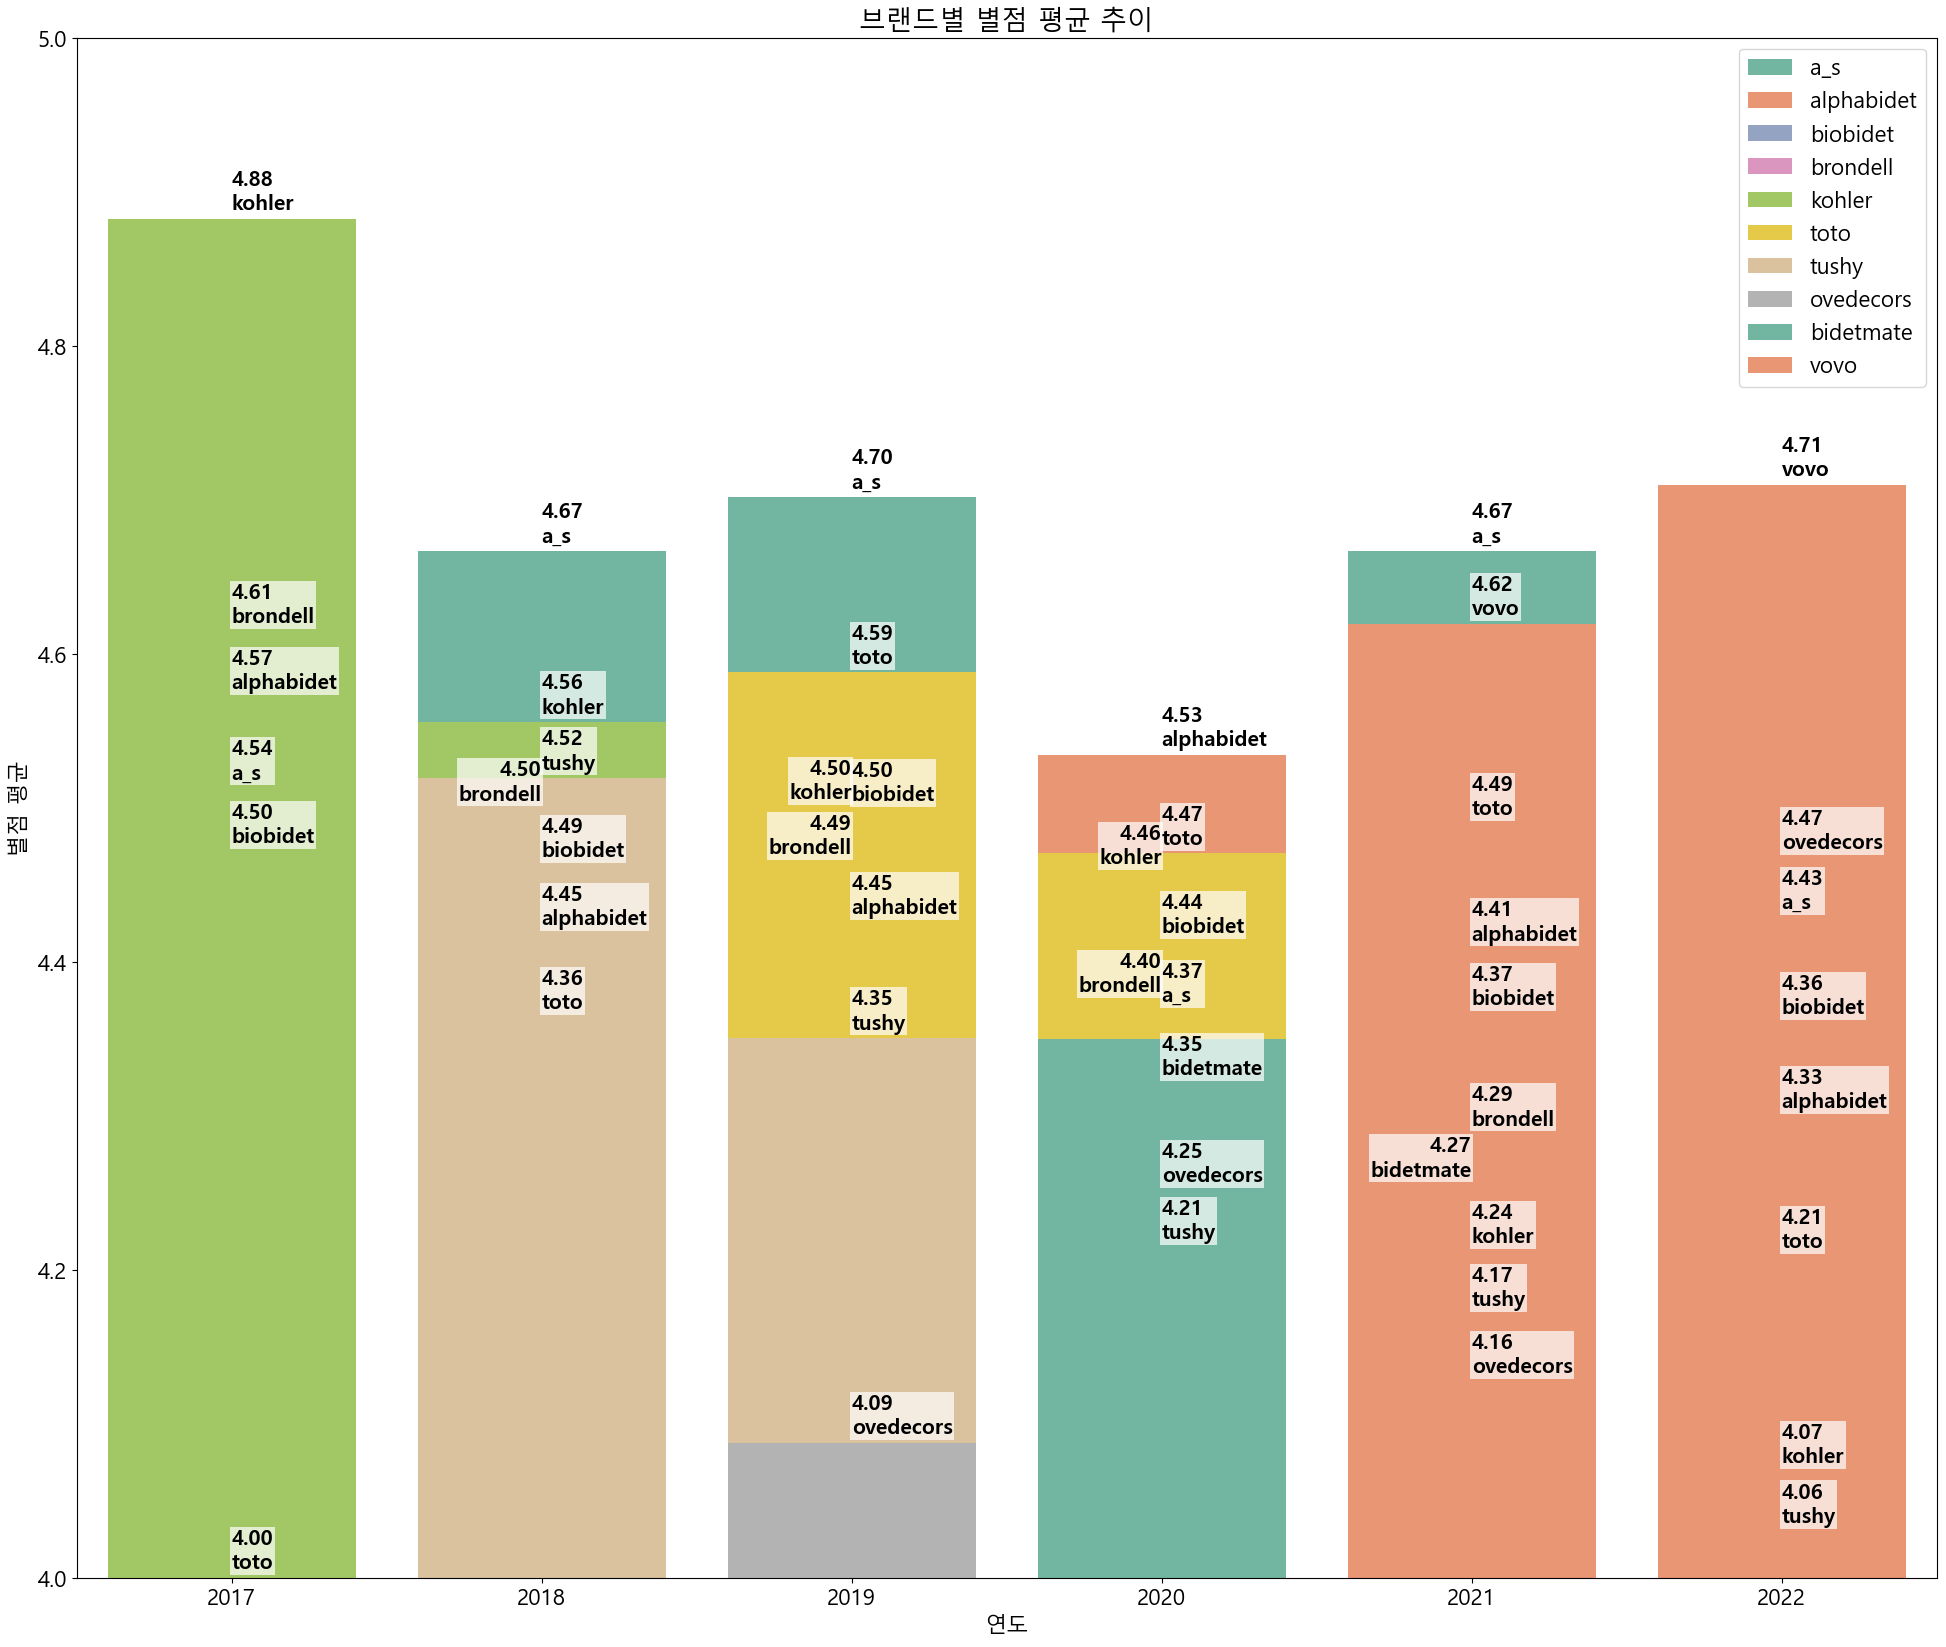

In [409]:
plt.figure(figsize=(24,20))
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=br, palette='Set2', dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 15, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)


plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('브랜드별 별점 평균 추이')
plt.legend(loc='upper right')
plt.ylim([4, 5])
plt.show()
   

### alphabidet

In [410]:
br1 = combined_ratings[combined_ratings['회사명']=='alphabidet']
br1

,회사명,제품명,작성일,별점,채널명,연도,분기
401,alphabidet,Alpha JX,2018-06-25,5,hd,2018,2018Q2
402,alphabidet,Alpha JX,2018-06-27,4,hd,2018,2018Q2
403,alphabidet,Alpha JX,2018-06-30,5,hd,2018,2018Q2
404,alphabidet,Alpha JX,2018-07-01,5,hd,2018,2018Q3
405,alphabidet,Alpha JX,2018-07-01,5,hd,2018,2018Q3
...,...,...,...,...,...,...,...
823,alphabidet,Alpha JX,2016-02-17,5,amazon,2016,2016Q1
824,alphabidet,Alpha JX,2016-01-01,2,amazon,2016,2016Q1
825,alphabidet,Alpha JX,2015-12-12,5,amazon,2015,2015Q4
826,alphabidet,Alpha JX,2015-10-15,5,amazon,2015,2015Q4


In [411]:
br1 = combined_ratings[combined_ratings['회사명']=='alphabidet']
br1 = br1.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br1 = br1[br1['연도'].astype(str).astype(int)>=2017]
br1

,연도,채널명,별점
2,2017,amazon,4.571429
3,2018,amazon,4.347826
4,2018,hd,4.600000
5,2019,amazon,4.360000
6,2019,hd,4.750000
7,2020,amazon,4.531915
8,2020,hd,4.545455
9,2021,amazon,4.456522
10,2021,hd,3.666667
11,2022,amazon,4.347826


#### 막대그래프

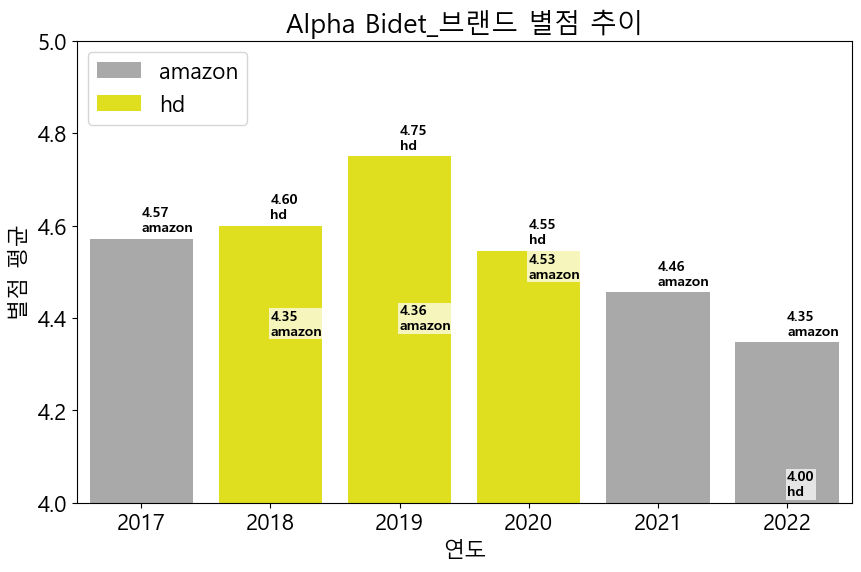

In [412]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br1['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br1, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Alpha Bidet_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### american standard

In [413]:
br2 = combined_ratings[combined_ratings['회사명']=='a_s']
br2

,회사명,제품명,작성일,별점,채널명,연도,분기
30713,a_s,Advanced Clean 2.0 SpaLet,2017-09-26,4,build.com,2017,2017Q3
30714,a_s,Advanced Clean 2.0 SpaLet,2017-09-30,5,build.com,2017,2017Q3
30715,a_s,Advanced Clean 2.0 SpaLet,2017-09-30,5,build.com,2017,2017Q3
30716,a_s,Advanced Clean 2.0 SpaLet,2017-09-30,5,build.com,2017,2017Q3
30717,a_s,Advanced Clean 2.0 SpaLet,2017-10-02,5,build.com,2017,2017Q4
...,...,...,...,...,...,...,...
30883,a_s,AquaWash 2.0 SpaLet,2020-04-22,5,build.com,2020,2020Q2
30884,a_s,AquaWash 2.0 SpaLet,2020-10-28,5,build.com,2020,2020Q4
30885,a_s,AquaWash 2.0 SpaLet,2020-11-27,5,build.com,2020,2020Q4
30886,a_s,AquaWash 2.0 SpaLet,2020-12-17,5,build.com,2020,2020Q4


In [414]:
br2 = combined_ratings[combined_ratings['회사명']=='a_s']
br2 = br2.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br2 = br2[br2['연도'].astype(str).astype(int)>=2017]
br2

,연도,채널명,별점
0,2017,build.com,4.536585
1,2017,lowes,4.547619
2,2018,build.com,4.666667
3,2018,lowes,4.666667
4,2019,build.com,4.703704
5,2019,lowes,4.666667
6,2020,build.com,4.470588
7,2020,lowes,3.500000
8,2021,build.com,5.000000
9,2021,lowes,4.000000


#### 막대그래프

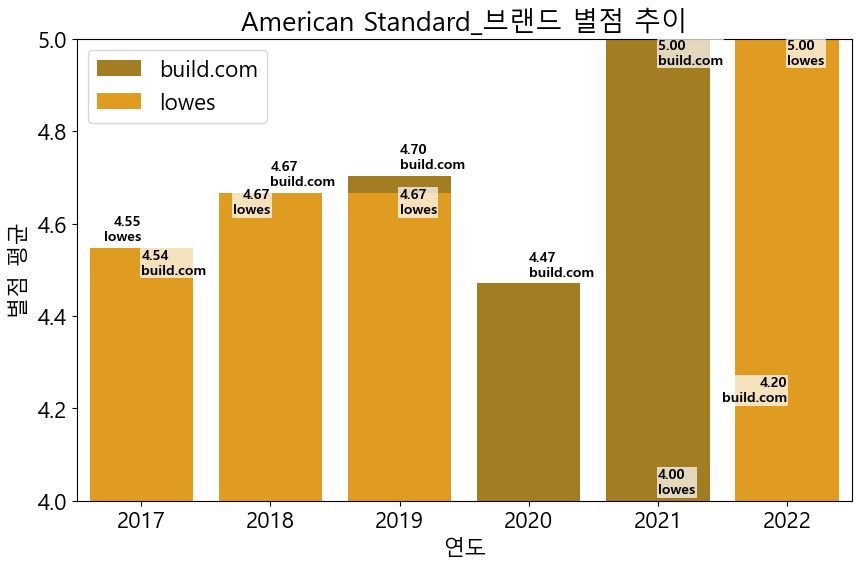

In [415]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br2['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br2, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('American Standard_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### bidetmate

In [416]:
br3 = combined_ratings[combined_ratings['회사명']=='bidetmate']
br3

,회사명,제품명,작성일,별점,채널명,연도,분기
29605,bidetmate,3000 Series,2022-12-04,5,amazon,2022,2022Q4
29606,bidetmate,3000 Series,2022-12-03,5,amazon,2022,2022Q4
29607,bidetmate,3000 Series,2022-11-27,5,amazon,2022,2022Q4
29608,bidetmate,3000 Series,2022-11-15,1,amazon,2022,2022Q4
29609,bidetmate,3000 Series,2022-11-12,5,amazon,2022,2022Q4
...,...,...,...,...,...,...,...
30479,bidetmate,2000 Series,2022-03-24,5,amazon,2022,2022Q1
30480,bidetmate,2000 Series,2022-03-23,5,amazon,2022,2022Q1
30481,bidetmate,2000 Series,2022-03-17,5,amazon,2022,2022Q1
30482,bidetmate,2000 Series,2022-03-15,5,amazon,2022,2022Q1


In [417]:
br3 = combined_ratings[combined_ratings['회사명']=='bidetmate']
br3 = br3.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br3 = br3[br3['연도'].astype(str).astype(int)>=2017]
br3

,연도,채널명,별점
0,2020,amazon,4.350000
1,2021,amazon,4.269565
2,2022,amazon,3.977011


#### 막대그래프

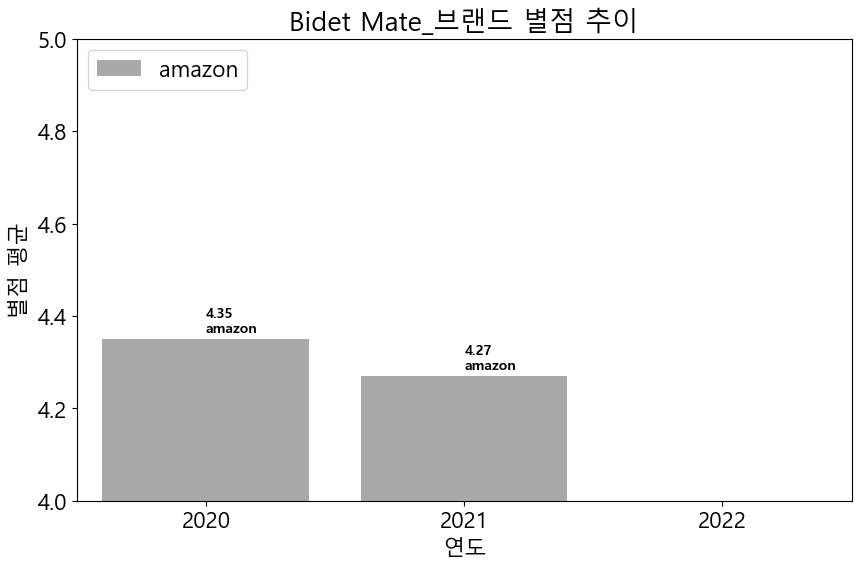

In [418]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br3['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br3, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Bidet Mate_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### biobidet

In [419]:
br4 = combined_ratings[combined_ratings['회사명']=='biobidet']
br4

,회사명,제품명,작성일,별점,채널명,연도,분기
3109,biobidet,BB600,2012-08-01,5,hd,2012,2012Q3
3110,biobidet,BB600,2013-03-06,5,hd,2013,2013Q1
3111,biobidet,BB600,2013-04-23,1,hd,2013,2013Q2
3112,biobidet,BB600,2013-07-14,5,hd,2013,2013Q3
3113,biobidet,BB600,2014-04-09,5,hd,2014,2014Q2
...,...,...,...,...,...,...,...
30970,biobidet,BB A8,2022-01-24,5,lowes,2022,2022Q1
30971,biobidet,BB A8,2020-04-27,5,lowes,2020,2020Q2
30972,biobidet,BB A8,2016-10-13,5,lowes,2016,2016Q4
30973,biobidet,BB A8,2020-09-20,3,lowes,2020,2020Q3


In [420]:
br4 = combined_ratings[combined_ratings['회사명']=='biobidet']
br4 = br4.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br4 = br4[br4['연도'].astype(str).astype(int)>=2017]
br4

,연도,채널명,별점
24,2017,amazon,4.031250
25,2017,build.com,4.754098
26,2017,costco,4.355491
27,2017,hd,4.657895
28,2017,lowes,4.772727
29,2017,walmart,4.746269
30,2018,amazon,4.216049
31,2018,build.com,4.777778
32,2018,costco,4.508228
33,2018,hd,4.712329


#### 막대그래프

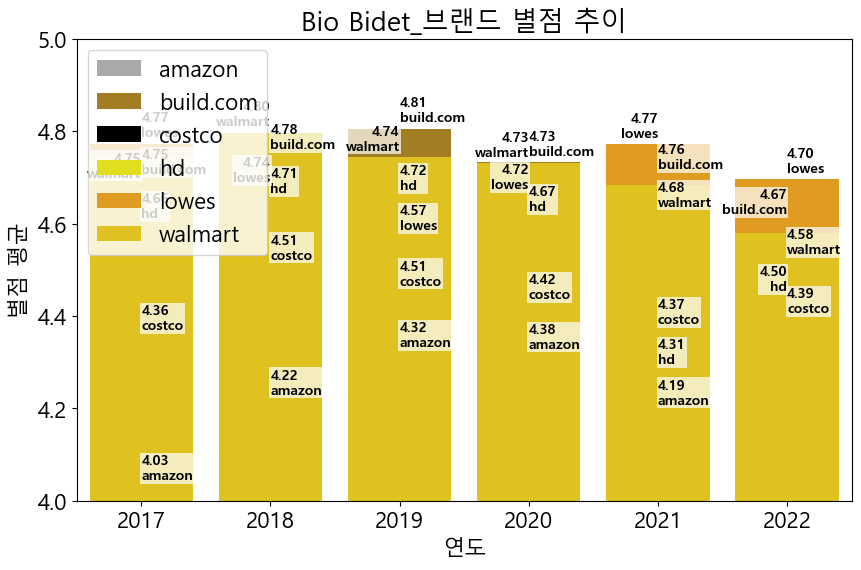

In [421]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br4['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br4, palette=palette, dodge=False)
        
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Bio Bidet_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### brondell

In [422]:
br5 = combined_ratings[combined_ratings['회사명']=='brondell']
br5

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,lowes,2019,2019Q4


In [423]:
br5 = combined_ratings[combined_ratings['회사명']=='brondell']
br5 = br5.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br5 = br5[br5['연도'].astype(str).astype(int)>=2017]
br5

,연도,채널명,별점
11,2017,amazon,4.382979
12,2017,build.com,4.882353
13,2017,costco,4.541667
14,2017,hd,4.810811
15,2017,lowes,4.782609
16,2017,walmart,4.882353
17,2018,amazon,4.281250
18,2018,build.com,4.850000
19,2018,costco,4.499331
20,2018,hd,4.524590


#### 막대그래프

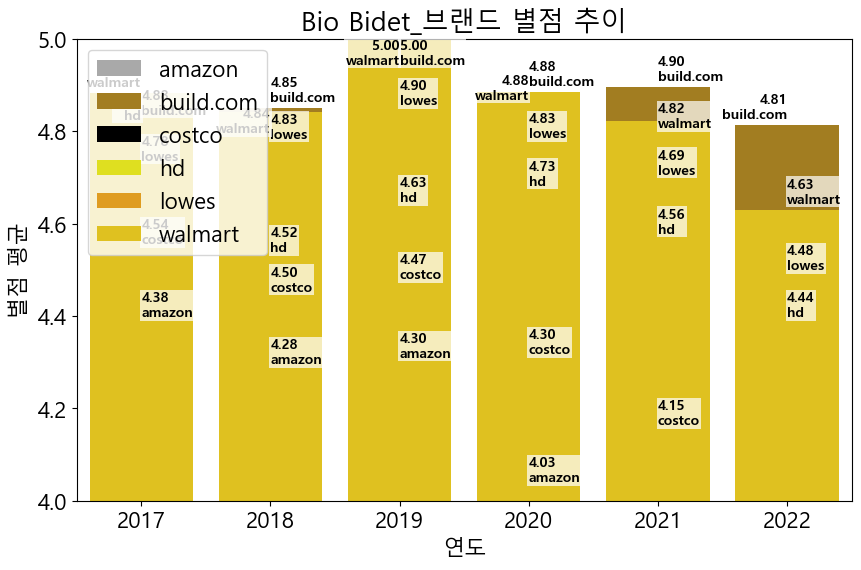

In [424]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br5['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br5, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Bio Bidet_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### kohler

In [425]:
br6 = combined_ratings[combined_ratings['회사명']=='kohler']
br6

,회사명,제품명,작성일,별점,채널명,연도,분기
23895,kohler,Novita,2022-10-01,1,costco,2022,2022Q4
23896,kohler,Novita,2021-11-30,4,costco,2021,2021Q4
23897,kohler,Novita,2022-06-03,5,costco,2022,2022Q2
23898,kohler,Novita,2022-04-04,5,costco,2022,2022Q2
23899,kohler,Novita,2022-01-04,2,costco,2022,2022Q1
...,...,...,...,...,...,...,...
30708,kohler,C3-455,2022-08-06,1,build.com,2022,2022Q3
30709,kohler,C3-455,2022-08-31,5,build.com,2022,2022Q3
30710,kohler,C3-455,2022-09-04,5,build.com,2022,2022Q3
30711,kohler,C3-455,2022-11-30,5,build.com,2022,2022Q4


In [426]:
br6 = combined_ratings[combined_ratings['회사명']=='kohler']
br6 = br6.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br6 = br6[br6['연도'].astype(str).astype(int)>=2017]
br6

,연도,채널명,별점
2,2017,build.com,4.882353
3,2018,build.com,4.555556
4,2019,build.com,4.500000
5,2020,build.com,4.512821
6,2020,lowes,4.350000
7,2021,build.com,4.358491
8,2021,costco,3.833333
9,2021,lowes,4.166667
10,2022,build.com,4.053571
11,2022,costco,4.102041


#### 막대그래프

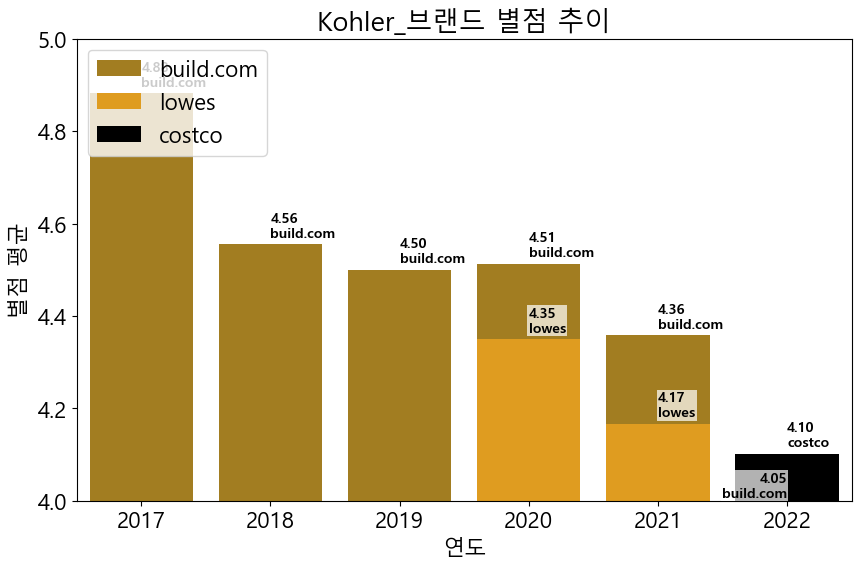

In [427]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br6['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br6, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Kohler_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### ovedecors

In [428]:
br7 = combined_ratings[combined_ratings['회사명']=='ovedecors']
br7

,회사명,제품명,작성일,별점,채널명,연도,분기
24025,ovedecors,Irenne,2021-11-30,5,costco,2021,2021Q4
24026,ovedecors,Irenne,2022-08-02,4,costco,2022,2022Q3
24027,ovedecors,Irenne,2021-11-30,5,costco,2021,2021Q4
24028,ovedecors,Irenne,2020-11-30,5,costco,2020,2020Q4
24029,ovedecors,Irenne,2019-12-01,5,costco,2019,2019Q4
...,...,...,...,...,...,...,...
24466,ovedecors,Irenne,2022-02-03,5,costco,2022,2022Q1
24467,ovedecors,Irenne,2022-06-03,5,costco,2022,2022Q2
24468,ovedecors,Irenne,2022-06-03,4,costco,2022,2022Q2
24469,ovedecors,Irenne,2020-11-30,5,costco,2020,2020Q4


In [429]:
br7 = combined_ratings[combined_ratings['회사명']=='ovedecors']
br7 = br7.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br7 = br7[br7['연도'].astype(str).astype(int)>=2017]
br7

,연도,채널명,별점
0,2019,costco,4.087500
1,2020,costco,4.251337
2,2021,costco,4.156863
3,2022,costco,4.467532


#### 막대그래프

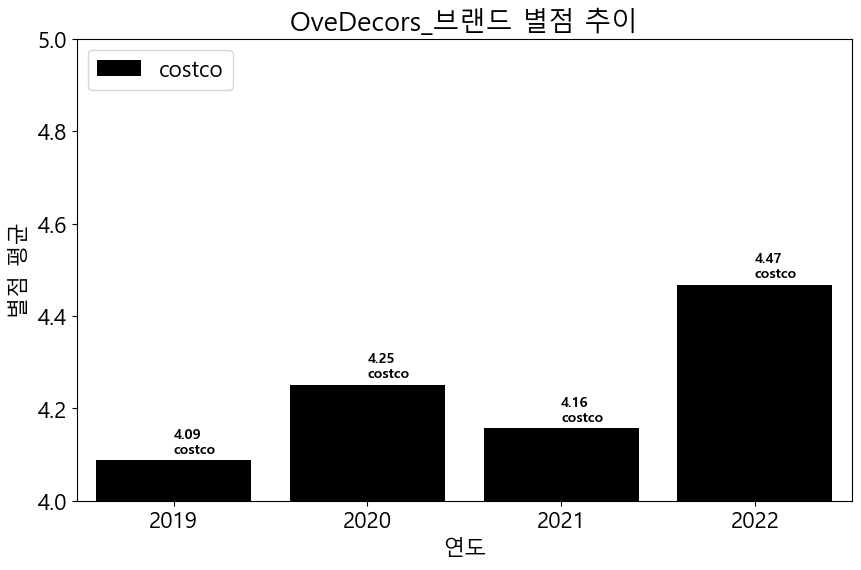

In [430]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br7['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br7, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('OveDecors_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### toto

In [431]:
br8 = combined_ratings[combined_ratings['회사명']=='toto']
br8

,회사명,제품명,작성일,별점,채널명,연도,분기
828,toto,SW3074 C2,2021-05-28,5,hd,2021,2021Q2
829,toto,SW3074 C2,2021-05-31,4,hd,2021,2021Q2
830,toto,SW3074 C2,2021-06-01,5,hd,2021,2021Q2
831,toto,SW3074 C2,2021-06-02,5,hd,2021,2021Q2
832,toto,SW3074 C2,2021-06-04,5,hd,2021,2021Q2
...,...,...,...,...,...,...,...
30894,toto,SW3046 S500,2022-01-21,5,build.com,2022,2022Q1
30895,toto,SW3046 S500,2022-04-10,5,build.com,2022,2022Q2
30896,toto,SW3046 S500,2022-05-04,5,build.com,2022,2022Q2
30897,toto,SW3046 S500,2022-06-17,5,build.com,2022,2022Q2


In [432]:
br8 = combined_ratings[combined_ratings['회사명']=='toto']
br8 = br8.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br8 = br8[br8['연도'].astype(str).astype(int)>=2017]
br8

,연도,채널명,별점
4,2017,amazon,4.000000
5,2018,amazon,4.363636
6,2019,amazon,4.588957
7,2019,hd,4.500000
8,2020,amazon,4.479638
9,2020,build.com,4.333333
10,2020,hd,4.333333
11,2021,amazon,4.458797
12,2021,build.com,4.562500
13,2021,hd,4.714286


#### 막대그래프

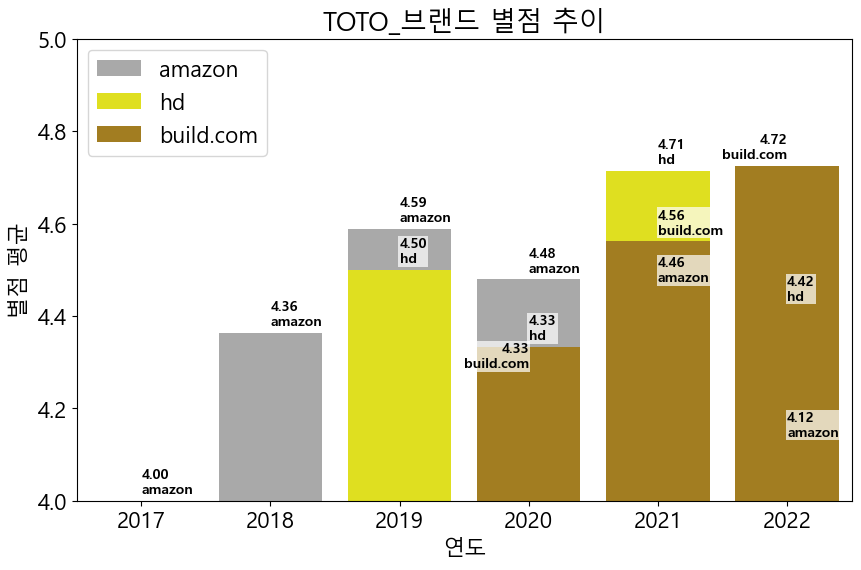

In [433]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br8['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br8, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('TOTO_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### tushy

In [434]:
br9 = combined_ratings[combined_ratings['회사명']=='tushy']
br9

,회사명,제품명,작성일,별점,채널명,연도,분기
27348,tushy,Basic 2.0,2022-12-06,5,amazon,2022,2022Q4
27349,tushy,Basic 2.0,2022-12-06,5,amazon,2022,2022Q4
27350,tushy,Basic 2.0,2022-12-05,1,amazon,2022,2022Q4
27351,tushy,Basic 2.0,2022-12-05,5,amazon,2022,2022Q4
27352,tushy,Basic 2.0,2022-12-04,1,amazon,2022,2022Q4
...,...,...,...,...,...,...,...
29188,tushy,Classic 3.0,2021-04-26,1,amazon,2021,2021Q2
29189,tushy,Classic 3.0,2021-04-21,5,amazon,2021,2021Q2
29190,tushy,Classic 3.0,2021-04-11,4,amazon,2021,2021Q2
29191,tushy,Classic 3.0,2021-03-27,5,amazon,2021,2021Q1


In [435]:
br9 = combined_ratings[combined_ratings['회사명']=='tushy']
br9 = br9.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br9 = br9[br9['연도'].astype(str).astype(int)>=2017]
br9

,연도,채널명,별점
0,2018,amazon,4.519231
1,2019,amazon,4.350394
2,2020,amazon,4.214286
3,2021,amazon,4.170787
4,2022,amazon,4.059486


#### 막대그래프

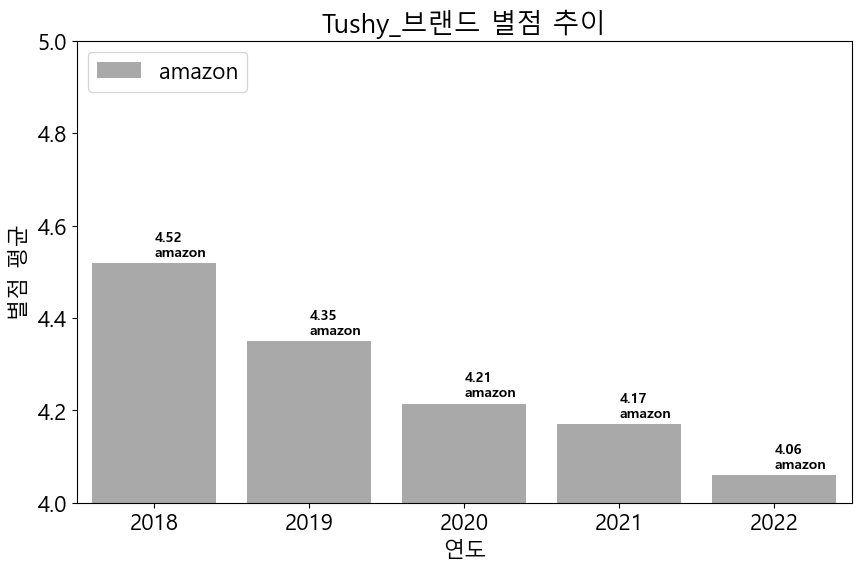

In [436]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br9['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br9, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Tushy_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### vovo

In [437]:
br10 = combined_ratings[combined_ratings['회사명']=='vovo']
br10

,회사명,제품명,작성일,별점,채널명,연도,분기
30975,vovo,VB-6100SR,2021-04-13,4,lowes,2021,2021Q2
30976,vovo,VB-6100SR,2021-04-23,5,lowes,2021,2021Q2
30977,vovo,VB-6100SR,2021-06-24,5,lowes,2021,2021Q2
30978,vovo,VB-6100SR,2021-05-27,4,lowes,2021,2021Q2
30979,vovo,VB-6100SR,2021-04-03,5,lowes,2021,2021Q2
...,...,...,...,...,...,...,...
31114,vovo,VB-6000SE,2022-05-23,5,lowes,2022,2022Q2
31115,vovo,VB-6000SE,2021-07-23,4,lowes,2021,2021Q3
31116,vovo,VB-6000SE,2022-05-03,5,lowes,2022,2022Q2
31117,vovo,VB-6000SE,2021-06-09,5,lowes,2021,2021Q2


In [438]:
br10 = combined_ratings[combined_ratings['회사명']=='vovo']
br10 = br10.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br10 = br10[br10['연도'].astype(str).astype(int)>=2017]
br10

,연도,채널명,별점
0,2021,lowes,4.619469
1,2022,lowes,4.709677


#### 막대그래프

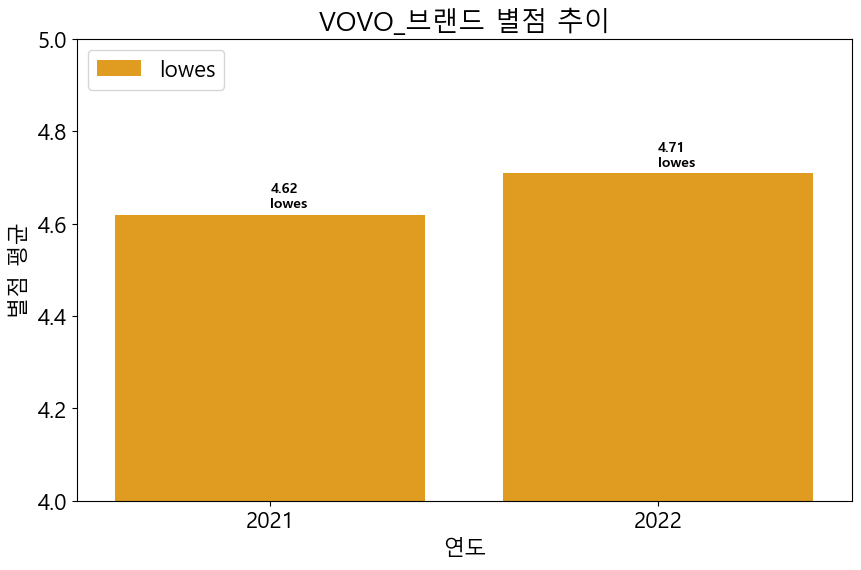

In [439]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br10['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br10, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('VOVO_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

# 제품별

In [526]:
combined_ratings

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,lowes,2019,2019Q4


In [527]:
pr = combined_ratings[combined_ratings['연도'].astype(str).astype(int)>=2017]
pr

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,lowes,2019,2019Q4


In [528]:
pr1 = pr.groupby(['회사명', '제품명'])['별점'].agg(['mean', 'sum']).reset_index().sort_values(by='mean', ascending=False)
pr1

,회사명,제품명,mean,sum
11,biobidet,BB1700,4.862385,530
22,brondell,S1000,4.814103,751
14,biobidet,BB800,4.779070,411
7,biobidet,BB A8,4.736842,270
1,a_s,Advanced Clean 2.0 SpaLet,4.714286,264
3,a_s,AquaWash 2.0 SpaLet,4.692308,183
10,biobidet,BB1000,4.687192,1903
19,brondell,CL510,4.675676,173
40,vovo,VB-6000SE,4.666667,56
39,vovo,VB-4000SE,4.654545,256


In [529]:
pr1['브랜드명_제품명'] = pr1['회사명'] + '_' + pr1['제품명']
pr1

,회사명,제품명,mean,sum,브랜드명_제품명
11,biobidet,BB1700,4.862385,530,biobidet_BB1700
22,brondell,S1000,4.814103,751,brondell_S1000
14,biobidet,BB800,4.779070,411,biobidet_BB800
7,biobidet,BB A8,4.736842,270,biobidet_BB A8
1,a_s,Advanced Clean 2.0 SpaLet,4.714286,264,a_s_Advanced Clean 2.0 SpaLet
3,a_s,AquaWash 2.0 SpaLet,4.692308,183,a_s_AquaWash 2.0 SpaLet
10,biobidet,BB1000,4.687192,1903,biobidet_BB1000
19,brondell,CL510,4.675676,173,brondell_CL510
40,vovo,VB-6000SE,4.666667,56,vovo_VB-6000SE
39,vovo,VB-4000SE,4.654545,256,vovo_VB-4000SE


In [530]:
pr1 = pr1[:25]
pr1

,회사명,제품명,mean,sum,브랜드명_제품명
11,biobidet,BB1700,4.862385,530,biobidet_BB1700
22,brondell,S1000,4.814103,751,brondell_S1000
14,biobidet,BB800,4.779070,411,biobidet_BB800
7,biobidet,BB A8,4.736842,270,biobidet_BB A8
1,a_s,Advanced Clean 2.0 SpaLet,4.714286,264,a_s_Advanced Clean 2.0 SpaLet
3,a_s,AquaWash 2.0 SpaLet,4.692308,183,a_s_AquaWash 2.0 SpaLet
10,biobidet,BB1000,4.687192,1903,biobidet_BB1000
19,brondell,CL510,4.675676,173,brondell_CL510
40,vovo,VB-6000SE,4.666667,56,vovo_VB-6000SE
39,vovo,VB-4000SE,4.654545,256,vovo_VB-4000SE


In [531]:
pr1['제품명'].values

array(['BB1700', 'S1000', 'BB800', 'BB A8', 'Advanced Clean 2.0 SpaLet',
       'AquaWash 2.0 SpaLet', 'BB1000', 'CL510', 'VB-6000SE', 'VB-4000SE',
       'SW3046 S500', 'Advanced Clean 2.5 SpaLet', 'VB-6100SR', 'C3-050',
       'DIB', 'C3-455', 'BB2000', 'S1400', 'SW3036 K300', 'BB USPA 6800',
       'Alpha JX', 'CL1000', 'SW3056 S550', 'BB Elite3', 'EM617'],
      dtype=object)

#### TOP 20

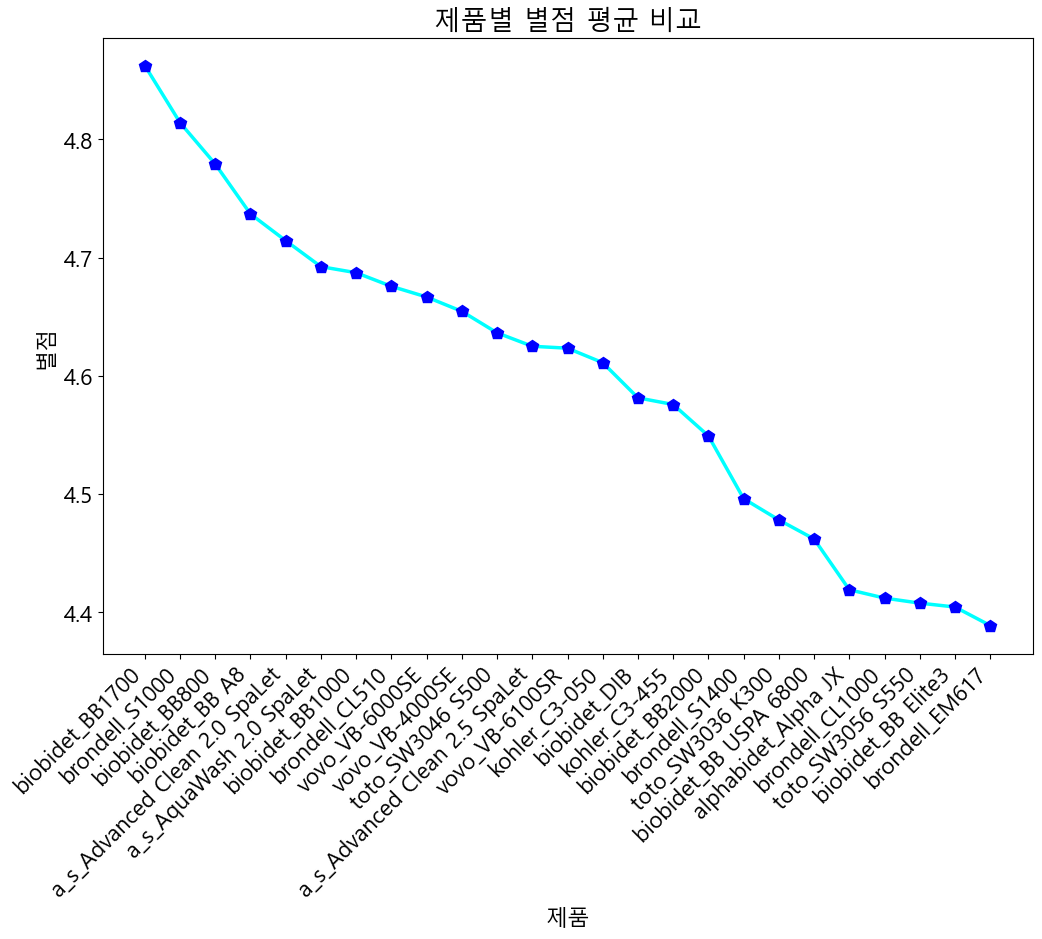

In [532]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(pr1['브랜드명_제품명'], pr1['mean'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('제품별 별점 평균 비교')  # 그래프 제목 설정
plt.xlabel('제품')  # x축 레이블 설정
plt.ylabel('별점')  # y축 레이블 설정
plt.xticks(rotation=45, ha='right')  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [533]:
pr2 = pr.groupby(['연도', '제품명'])['별점'].mean().reset_index()[['연도', '제품명', '별점']]
pr2

,연도,제품명,별점
0,2017,Advanced Clean 1.0 SpaLet,4.294118
1,2017,Advanced Clean 2.0 SpaLet,4.714286
2,2017,Alpha JX,4.571429
3,2017,BB A8,4.750000
4,2017,BB Elite3,4.404040
...,...,...,...
184,2022,SW3084 C5,4.160714
185,2022,SW583 S350,4.500000
186,2022,VB-4000SE,4.571429
187,2022,VB-6000SE,4.571429


In [534]:
product_list = pr1['제품명'].values.tolist()

pr2 = pr2[pr2['제품명'].isin(product_list)].sort_values(by='별점', ascending=False)
pr2

,연도,제품명,별점
61,2019,C3-455,5.0
154,2022,BB A8,5.0
96,2020,CL510,5.0
38,2018,DIB,5.0
37,2018,CL510,5.0
...,...,...,...
109,2021,Advanced Clean 2.0 SpaLet,4.0
59,2019,C3-050,4.0
173,2022,EM617,4.0
170,2022,CL510,3.8


In [535]:
df_pivot = pr2.pivot_table(values='별점', index='연도', columns='제품명')
df_pivot.fillna(method='backfill', inplace=True)
df_pivot.fillna(method='ffill', inplace=True)
df_pivot

제품명,Advanced Clean 2.0 SpaLet,Advanced Clean 2.5 SpaLet,Alpha JX,AquaWash 2.0 SpaLet,BB A8,BB Elite3,BB USPA 6800,BB1000,BB1700,BB2000,...,DIB,EM617,S1000,S1400,SW3036 K300,SW3046 S500,SW3056 S550,VB-4000SE,VB-6000SE,VB-6100SR
연도,,,,,,,,,,,,,,,,,,,,,
2017,4.714286,4.666667,4.571429,4.727273,4.750000,4.404040,4.336032,4.753623,5.000000,4.704403,...,4.666667,4.411765,4.656250,4.727273,4.411765,4.2,4.333333,4.666667,4.800000,4.566667
2018,5.000000,4.666667,4.447368,4.727273,5.000000,4.407534,4.524251,4.677419,5.000000,4.712644,...,5.000000,4.411765,4.805556,4.390863,4.411765,4.2,4.333333,4.666667,4.800000,4.566667
2019,5.000000,4.666667,4.454545,4.727273,4.888889,4.538787,4.502186,4.250000,4.916667,4.568376,...,4.428571,4.411765,4.764706,4.524590,4.546512,4.2,4.647059,4.666667,4.800000,4.566667
2020,5.000000,4.400000,4.534483,5.000000,4.411765,4.376156,4.461508,4.902778,4.765957,4.526412,...,4.666667,4.411765,4.937500,4.603960,4.528302,4.2,4.481132,4.666667,4.800000,4.566667
2021,4.000000,5.000000,4.408163,2.000000,4.777778,4.257261,4.399533,4.733333,4.882353,4.533175,...,5.000000,4.411765,4.733333,4.461538,4.525424,5.0,4.304348,4.666667,4.800000,4.566667
2022,4.500000,5.000000,4.328767,2.000000,5.000000,4.394737,4.392318,4.448276,4.800000,4.451220,...,4.142857,4.000000,5.000000,4.115556,4.294118,5.0,4.209677,4.571429,4.571429,4.823529


#### TOP20 별점 추이

<Figure size 2000x1600 with 0 Axes>

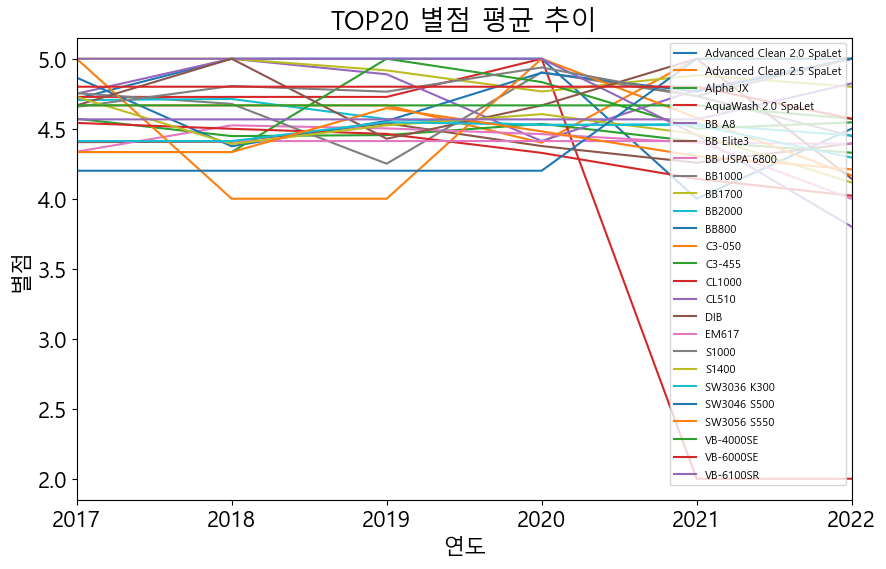

In [536]:
plt.figure(figsize=(20,16))  # 그래프 크기 설정
# pivot_table을 사용하여 데이터프레임 변형
df_pivot = pr2.pivot_table(values='별점', index='연도', columns='제품명')
df_pivot.fillna(method='backfill', inplace=True)
df_pivot.fillna(method='ffill', inplace=True)
df_pivot

# plot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(ax=ax)

# 그래프 꾸미기
ax.set_title('TOP20 별점 평균 추이')
ax.set_xlabel('연도')
ax.set_ylabel('별점')
ax.legend(fontsize=8)  # 범례 크기 조정
plt.show()

### 코스트코 제외

In [537]:
pr3 = pr[pr['채널명']!='costco']
pr3

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,lowes,2019,2019Q4


In [538]:
pr3 = pr3.groupby(['회사명', '제품명'])['별점'].agg(['mean', 'sum']).reset_index().sort_values(by='mean', ascending=False)
pr3

,회사명,제품명,mean,sum
9,biobidet,BB1700,4.862385,530
17,brondell,S1000,4.814103,751
12,biobidet,BB800,4.779070,411
7,biobidet,BB A8,4.736842,270
1,a_s,Advanced Clean 2.0 SpaLet,4.714286,264
3,a_s,AquaWash 2.0 SpaLet,4.692308,183
8,biobidet,BB1000,4.687192,1903
14,brondell,CL510,4.675676,173
34,vovo,VB-6000SE,4.666667,56
33,vovo,VB-4000SE,4.654545,256


In [539]:
pr3['브랜드명_제품명'] = pr3['회사명'] + '_' + pr3['제품명']
pr3

,회사명,제품명,mean,sum,브랜드명_제품명
9,biobidet,BB1700,4.862385,530,biobidet_BB1700
17,brondell,S1000,4.814103,751,brondell_S1000
12,biobidet,BB800,4.779070,411,biobidet_BB800
7,biobidet,BB A8,4.736842,270,biobidet_BB A8
1,a_s,Advanced Clean 2.0 SpaLet,4.714286,264,a_s_Advanced Clean 2.0 SpaLet
3,a_s,AquaWash 2.0 SpaLet,4.692308,183,a_s_AquaWash 2.0 SpaLet
8,biobidet,BB1000,4.687192,1903,biobidet_BB1000
14,brondell,CL510,4.675676,173,brondell_CL510
34,vovo,VB-6000SE,4.666667,56,vovo_VB-6000SE
33,vovo,VB-4000SE,4.654545,256,vovo_VB-4000SE


In [540]:
pr3 = pr3[:25]
pr3

,회사명,제품명,mean,sum,브랜드명_제품명
9,biobidet,BB1700,4.862385,530,biobidet_BB1700
17,brondell,S1000,4.814103,751,brondell_S1000
12,biobidet,BB800,4.779070,411,biobidet_BB800
7,biobidet,BB A8,4.736842,270,biobidet_BB A8
1,a_s,Advanced Clean 2.0 SpaLet,4.714286,264,a_s_Advanced Clean 2.0 SpaLet
3,a_s,AquaWash 2.0 SpaLet,4.692308,183,a_s_AquaWash 2.0 SpaLet
8,biobidet,BB1000,4.687192,1903,biobidet_BB1000
14,brondell,CL510,4.675676,173,brondell_CL510
34,vovo,VB-6000SE,4.666667,56,vovo_VB-6000SE
33,vovo,VB-4000SE,4.654545,256,vovo_VB-4000SE


In [541]:
pr3['제품명'].values

array(['BB1700', 'S1000', 'BB800', 'BB A8', 'Advanced Clean 2.0 SpaLet',
       'AquaWash 2.0 SpaLet', 'BB1000', 'CL510', 'VB-6000SE', 'VB-4000SE',
       'SW3046 S500', 'Advanced Clean 2.5 SpaLet', 'VB-6100SR', 'C3-050',
       'DIB', 'C3-455', 'BB2000', 'S1400', 'SW3036 K300', 'Novita',
       'Alpha JX', 'SW3056 S550', 'EM617', 'SE600', 'C3-155'],
      dtype=object)

#### TOP 20

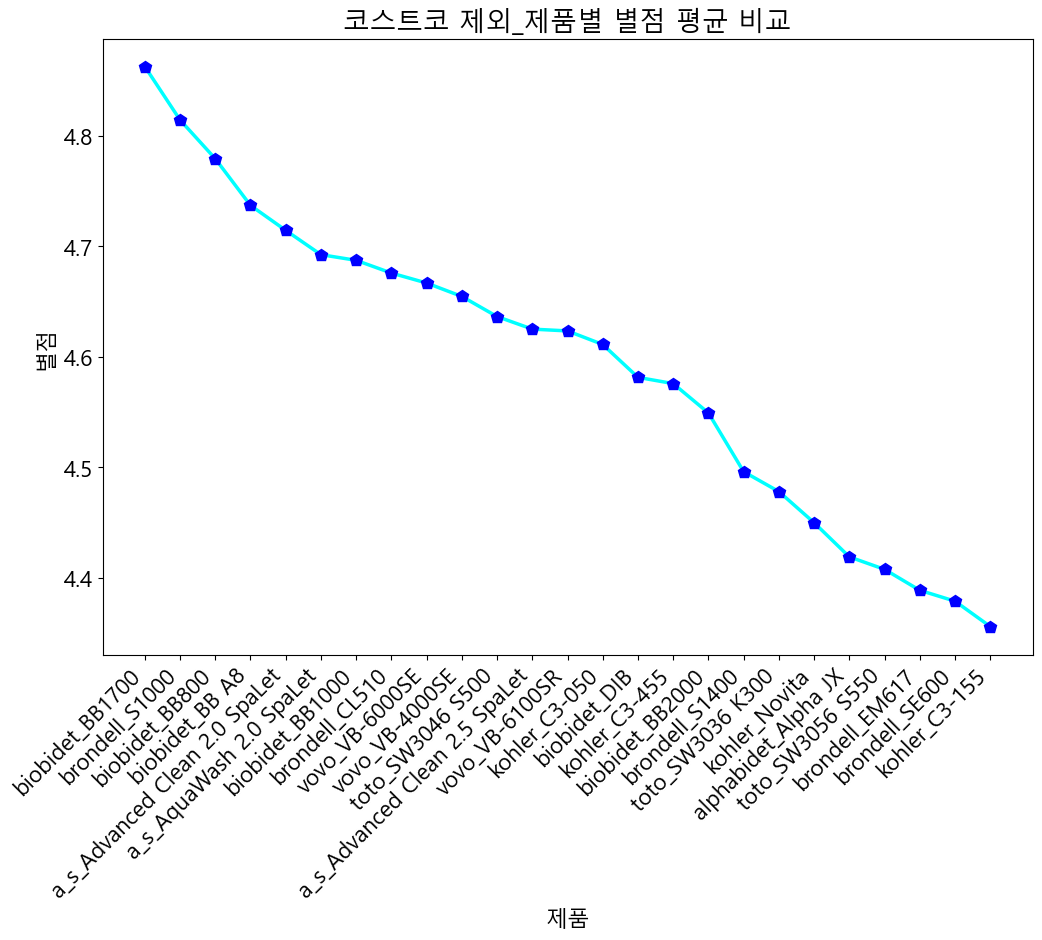

In [542]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(pr3['브랜드명_제품명'], pr3['mean'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('코스트코 제외_제품별 별점 평균 비교')  # 그래프 제목 설정
plt.xlabel('제품')  # x축 레이블 설정
plt.ylabel('별점')  # y축 레이블 설정
plt.xticks(rotation=45, ha='right')  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [543]:
pr4 = pr[pr['채널명']!='costco']
pr4

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,lowes,2019,2019Q4


In [544]:
pr4 = pr4.groupby(['연도', '제품명'])['별점'].mean().reset_index()[['연도', '제품명', '별점']]
pr4

,연도,제품명,별점
0,2017,Advanced Clean 1.0 SpaLet,4.294118
1,2017,Advanced Clean 2.0 SpaLet,4.714286
2,2017,Alpha JX,4.571429
3,2017,BB A8,4.750000
4,2017,BB1000,4.753623
...,...,...,...
154,2022,SW3084 C5,4.160714
155,2022,SW583 S350,4.500000
156,2022,VB-4000SE,4.571429
157,2022,VB-6000SE,4.571429


In [545]:
product_list = pr3['제품명'].values.tolist()

pr4 = pr4[pr4['제품명'].isin(product_list)].sort_values(by='별점', ascending=False)
pr4

,연도,제품명,별점
21,2018,BB A8,5.000000
32,2018,DIB,5.000000
67,2020,AquaWash 2.0 SpaLet,5.000000
75,2020,C3-050,5.000000
79,2020,CL510,5.000000
...,...,...,...
82,2020,Novita,4.000000
141,2022,CL510,3.800000
146,2022,Novita,3.666667
149,2022,SE600,3.656250


In [546]:
df_pivot = pr4.pivot_table(values='별점', index='연도', columns='제품명')
df_pivot.fillna(method='backfill', inplace=True)
df_pivot.fillna(method='ffill', inplace=True)
df_pivot

제품명,Advanced Clean 2.0 SpaLet,Advanced Clean 2.5 SpaLet,Alpha JX,AquaWash 2.0 SpaLet,BB A8,BB1000,BB1700,BB2000,BB800,C3-050,...,Novita,S1000,S1400,SE600,SW3036 K300,SW3046 S500,SW3056 S550,VB-4000SE,VB-6000SE,VB-6100SR
연도,,,,,,,,,,,,,,,,,,,,,
2017,4.714286,4.666667,4.571429,4.727273,4.750000,4.753623,5.000000,4.704403,4.864865,5.000000,...,4.875000,4.656250,4.727273,5.000000,4.411765,4.2,4.333333,4.666667,4.800000,4.566667
2018,5.000000,4.666667,4.447368,4.727273,5.000000,4.677419,5.000000,4.712644,4.375000,4.000000,...,4.875000,4.805556,4.390863,4.597561,4.411765,4.2,4.333333,4.666667,4.800000,4.566667
2019,5.000000,4.666667,4.454545,4.727273,4.888889,4.250000,4.916667,4.568376,4.555556,4.000000,...,4.000000,4.764706,4.524590,4.539683,4.546512,4.2,4.647059,4.666667,4.800000,4.566667
2020,5.000000,4.400000,4.534483,5.000000,4.411765,4.902778,4.765957,4.526412,4.900000,5.000000,...,4.000000,4.937500,4.603960,4.365854,4.528302,4.2,4.481132,4.666667,4.800000,4.566667
2021,4.000000,5.000000,4.408163,2.000000,4.777778,4.733333,4.882353,4.533175,4.764706,4.578947,...,4.375000,4.733333,4.461538,4.086957,4.525424,5.0,4.304348,4.666667,4.800000,4.566667
2022,4.500000,5.000000,4.328767,2.000000,5.000000,4.448276,4.800000,4.451220,5.000000,4.166667,...,3.666667,5.000000,4.115556,3.656250,4.294118,5.0,4.209677,4.571429,4.571429,4.823529


#### TOP20 별점 추이

<Figure size 2000x1600 with 0 Axes>

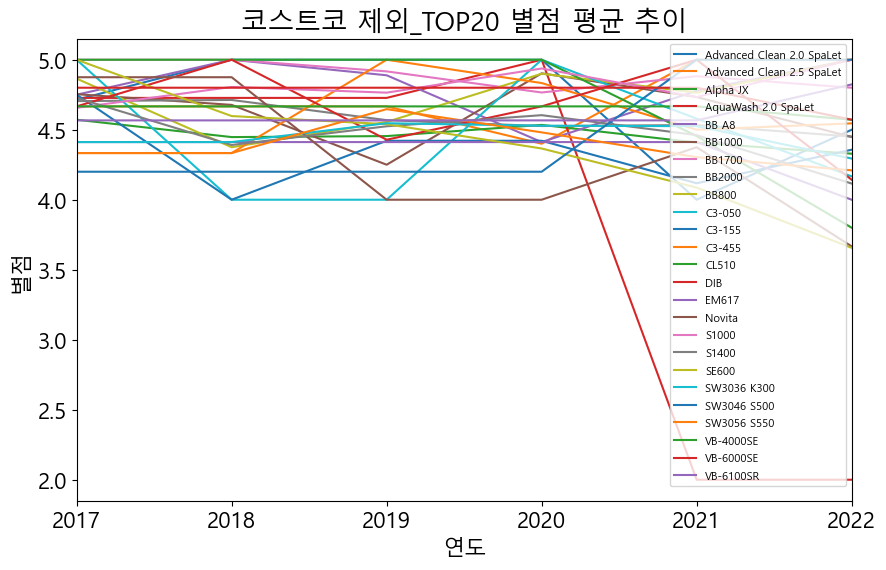

In [547]:
plt.figure(figsize=(20,16))  # 그래프 크기 설정
# pivot_table을 사용하여 데이터프레임 변형
df_pivot = pr4.pivot_table(values='별점', index='연도', columns='제품명')
df_pivot.fillna(method='backfill', inplace=True)
df_pivot.fillna(method='ffill', inplace=True)
df_pivot

# plot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(ax=ax)

# 그래프 꾸미기
ax.set_title('코스트코 제외_TOP20 별점 평균 추이')
ax.set_xlabel('연도')
ax.set_ylabel('별점')
ax.legend(fontsize=8)  # 범례 크기 조정
plt.show()

## 비교 정리

In [548]:
p1 = pr1['제품명'].values.tolist()
p2 = pr3['제품명'].values.tolist()
df_pr1 = pd.DataFrame(p1)
df_pr2 = pd.DataFrame(p2)
df_pr = pd.merge(df_pr1, df_pr2, how='outer', left_index=True, right_index=True)
df_pr

,0_x,0_y
0,BB1700,BB1700
1,S1000,S1000
2,BB800,BB800
3,BB A8,BB A8
4,Advanced Clean 2.0 SpaLet,Advanced Clean 2.0 SpaLet
5,AquaWash 2.0 SpaLet,AquaWash 2.0 SpaLet
6,BB1000,BB1000
7,CL510,CL510
8,VB-6000SE,VB-6000SE
9,VB-4000SE,VB-4000SE


In [549]:
matched = list(set(p1) and set(p2))
matched

['SW3036 K300',
 'C3-050',
 'C3-455',
 'BB1700',
 'BB1000',
 'S1400',
 'VB-4000SE',
 'BB2000',
 'Alpha JX',
 'EM617',
 'Advanced Clean 2.0 SpaLet',
 'SW3056 S550',
 'DIB',
 'S1000',
 'SW3046 S500',
 'Novita',
 'SE600',
 'CL510',
 'C3-155',
 'VB-6000SE',
 'Advanced Clean 2.5 SpaLet',
 'BB800',
 'AquaWash 2.0 SpaLet',
 'VB-6100SR',
 'BB A8']

In [550]:
unmatched = list(set(p1) ^ set(p2))
unmatched

['Novita', 'SE600', 'C3-155', 'CL1000', 'BB Elite3', 'BB USPA 6800']

# 파일 저장

In [551]:
# train_random.to_excel('bidet_train_data.xlsx', index=False)

In [552]:
# test_random.to_excel('bidet_test_data.xlsx', index=False)